In [336]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore all warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [337]:

# Load the datasets
Test_data_path = 'test.csv'
train_data_path = 'train.csv'
sample_price_path = 'sample_submission.csv'

Test_data = pd.read_csv(Test_data_path)
Train_data = pd.read_csv(train_data_path)
Test_price = pd.read_csv(sample_price_path)

In [338]:
#merging test data & test price
test_data = pd.merge(Test_data, Test_price, on='Id', how='inner')

In [339]:
# Concatenating train and test datasets row-wise (axis=0) to stack them
combined_data = pd.concat([Train_data, test_data], axis=0)

# Reset the index of the combined dataset (optional)
combined_data = combined_data.reset_index(drop=True)

In [340]:
combined_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
2914         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2915         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2916         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2917         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
2918         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition      SalePrice  
0         2   2008        WD         Normal  208500.000000  
1         5   2007        WD         Normal  181500.000000  
2         9   2008        WD         Normal  223500.000000  
3         2   2006        WD        Abnorml  140000.000000  
4        12   2008        WD         Normal  250000.000000  
...     ...    ...       ...            ...            ...  
2914      6   2006        WD         Normal  167081.220949  
2915      4   2006        WD        Abnorml  164788.778231  
2916      9   2006        WD        Abnorml  219222.423400  
2917      7   2006        WD         Normal  184924.279659  
2918     11   2006        WD         Normal  187741.866657  

[2919 rows x 81 columns]

In [341]:
combined_data.shape

(2919, 81)

In [342]:
#dropping duplicates
combined_data = combined_data.drop_duplicates()

In [343]:
combined_data.shape

(2919, 81)

In [344]:
combined_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [345]:
combined_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000  ...   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235  ...   
std       1.113131    30.291442     20.894344   179.334253   455.610826  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  2919.000000  2919.000000    2919.000000  2919.000000  2919.000000   
mean     93.709832    47.486811      23.098321     2.602261    16.062350   
std     126.526589    67.575493      64.244246    25.188169    56.184365   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    26.000000       0.000000     0.000000     0.000000   
75%     168.000000    70.000000       0.000000     0.000000     0.000000   
max    1424.000000   742.000000    1012.000000   508.000000   576.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  2919.000000   2919.000000  2919.000000  2919.000000    2919.000000  
mean      2.251799     50.825968     6.213087  2007.792737  180052.854647  
std      35.663946    567.402211     2.714762     1.314964   57381.565721  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     4.000000  2007.000000  154795.084126  
50%       0.000000      0.000000     6.000000  2008.000000  176734.841494  
75%       0.000000      0.000000     8.000000  2009.000000  191895.744157  
max     800.000000  17000.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [346]:
combined_data = combined_data.drop('Id', axis=1)

In [347]:
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [348]:
# Get columns with missing values (greater than 0)
missing_data = combined_data.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
Utilities          2
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
KitchenQual        1
GarageArea         1
GarageCars         1
SaleType           1
dtype: int64

In [349]:
#lots of null values
combined_data = combined_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

In [350]:
combined_data['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [351]:
combined_data['MasVnrType'].fillna('No', inplace=True)

In [352]:
combined_data['FireplaceQu'].fillna('No', inplace=True)

In [353]:
#apply LotFrontage median value since most of houses have value
combined_data['LotFrontage'] = combined_data['LotFrontage'].fillna(combined_data['LotFrontage'].median())

In [354]:
#No Garage
combined_data['GarageFinish'].fillna('No', inplace=True)
combined_data['GarageQual'].fillna('No', inplace=True)
combined_data['GarageCond'].fillna('No', inplace=True)

In [355]:
#check relation between garage year built and house built if it is same we can drop?
correlation = combined_data['GarageYrBlt'].corr(combined_data['YearBuilt'])
correlation

np.float64(0.8348123731631006)

In [356]:
#since corr is equal to 1 can drop?
combined_data.drop(columns=['GarageYrBlt'], inplace=True)

In [357]:
#basement exporsure = no basement
combined_data['BsmtExposure'].fillna('No', inplace=True)
combined_data['BsmtCond'].fillna('No', inplace=True)
combined_data['BsmtQual'].fillna('No', inplace=True)

combined_data['BsmtFinType1'].fillna('No', inplace=True)
combined_data['BsmtFinSF1'].fillna(0, inplace=True)
combined_data['BsmtUnfSF'].fillna(0, inplace=True)
combined_data['TotalBsmtSF'].fillna(0, inplace=True)
#drop basement 2 assuming only one basement
combined_data.drop(columns=['BsmtFinType2'], inplace=True)
combined_data.drop(columns=['BsmtFinSF2'], inplace=True)

In [358]:
#applied to the exterior walls of a building to enhance appearance and provide some protection against weather elements.
combined_data['MasVnrArea'].fillna(0, inplace=True)

In [359]:
# Fill NaN values with the mode (most common category)
mode_value = combined_data['MSZoning'].mode()[0]
combined_data['MSZoning'].fillna(mode_value, inplace=True)

In [360]:
combined_data['FullBath'].fillna(0, inplace=True)
combined_data['HalfBath'].fillna(0, inplace=True)

combined_data['BsmtFullBath'].fillna(0, inplace=True)
combined_data['BsmtHalfBath'].fillna(0, inplace=True)

In [361]:
mode_value = combined_data['Functional'].mode()[0]
combined_data['Functional'].fillna(mode_value, inplace=True)

In [362]:
mode_value = combined_data['Utilities'].mode()[0]
combined_data['Utilities'].fillna(mode_value, inplace=True)

In [363]:
combined_data['GarageCars'].fillna(0, inplace=True)
combined_data['GarageArea'].fillna(0, inplace=True)

combined_data['GarageType'].fillna('No', inplace=True)


In [364]:
combined_data['Electrical'].fillna('SBrkr', inplace=True)


In [365]:
for col in ['KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    mode_value = combined_data[col].mode()[0]
    combined_data[col].fillna(mode_value, inplace=True)

In [366]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [367]:
#get numerical columns
combined_data.dtypes[combined_data.dtypes != 'object']

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [368]:
#check outliers in numerical colunm and remove them as per scatter plot

In [369]:
#drop ouliers based on scatter plot by far off the most data
outliers =[]

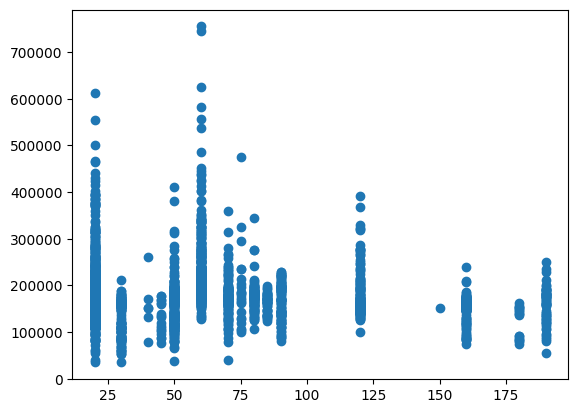

In [370]:
plt.scatter(x='MSSubClass', y='SalePrice', data=combined_data)

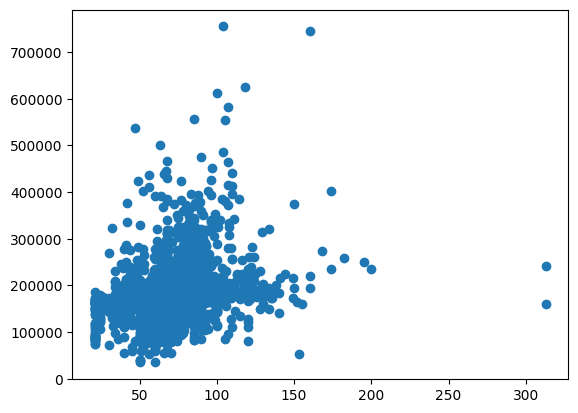

In [371]:
plt.scatter(x='LotFrontage', y='SalePrice', data=combined_data)

In [372]:
combined_data.query('LotFrontage > 300')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
934           20       RL        313.0    27650   Pave      IR2         HLS   
1298          60       RL        313.0    63887   Pave      IR3         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
934     AllPub    Inside       Mod  ...             0         0           0   
1298    AllPub    Corner       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
934         0       0      11    2008        WD         Normal  242000.0  
1298      480       0       1    2008       New        Partial  160000.0  

[2 rows x 73 columns]

In [373]:
outliers.append(934)
outliers.append(1298)

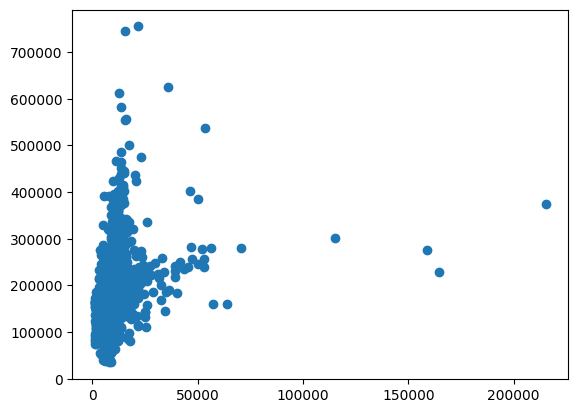

In [374]:
plt.scatter(x='LotArea', y='SalePrice', data=combined_data)

In [375]:
combined_data.query('LotArea > 100000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
249          50       RL         68.0   159000   Pave      IR2         Low   
313          20       RL        150.0   215245   Pave      IR3         Low   
335         190       RL         68.0   164660   Grvl      IR1         HLS   
706          20       RL         68.0   115149   Pave      IR2         Low   

    Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
249    AllPub   CulDSac       Sev  ...             0         0           0   
313    AllPub    Inside       Sev  ...             0         0           0   
335    AllPub    Corner       Sev  ...             0         0           0   
706    AllPub   CulDSac       Sev  ...             0         0           0   

    PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
249        0     500       6    2007        WD         Normal  277000.0  
313        0       0       6    2009        WD         Normal  375000.0  
335        0     700       8    2008        WD         Normal  228950.0  
706        0       0       6    2007        WD         Normal  302000.0  

[4 rows x 73 columns]

In [376]:
outliers.append(249)
outliers.append(313)
outliers.append(335)
outliers.append(706)

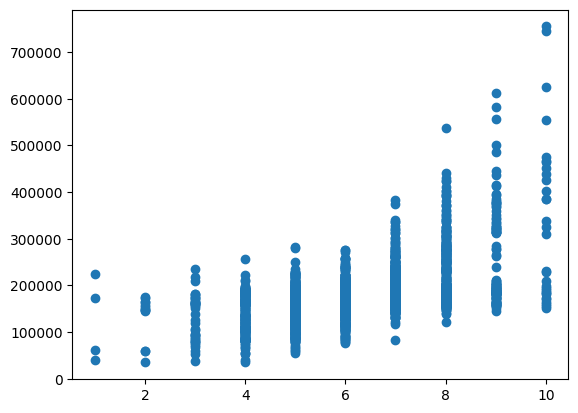

In [377]:
plt.scatter(x='OverallQual', y='SalePrice', data=combined_data)

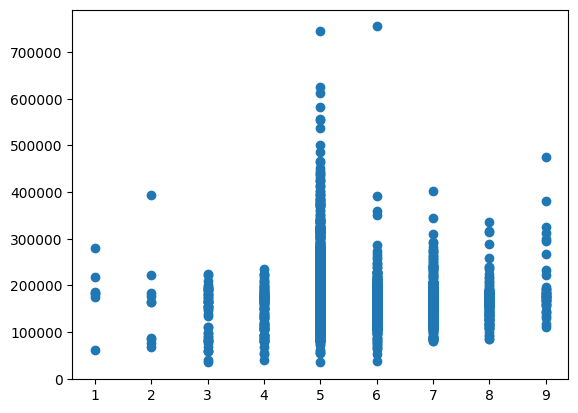

In [378]:
plt.scatter(x='OverallCond', y='SalePrice', data=combined_data)

In [379]:
combined_data.query('OverallCond == 5 & SalePrice > 700000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1182          60       RL        160.0    15623   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1182    AllPub    Corner       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
1182      555       0       7    2007        WD        Abnorml  745000.0  

[1 rows x 73 columns]

In [380]:
outliers.append(1182)

In [381]:
combined_data.query('OverallCond == 6 & SalePrice > 700000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
691          60       RL        104.0    21535   Pave      IR1         Lvl   

    Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
691    AllPub    Corner       Gtl  ...             0         0           0   

    PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
691        0       0       1    2007        WD         Normal  755000.0  

[1 rows x 73 columns]

In [382]:
outliers.append(691)

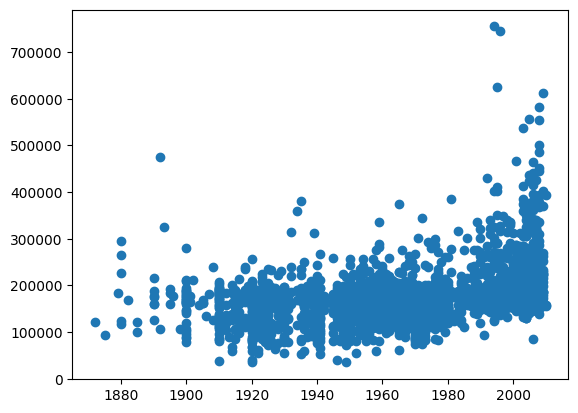

In [383]:
plt.scatter(x='YearBuilt', y='SalePrice', data=combined_data)

In [384]:
combined_data.query('YearBuilt < 1900 & SalePrice > 400000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
185          75       RM         90.0    22950   Pave      IR2         Lvl   

    Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
185    AllPub    Inside       Gtl  ...             0         0         410   

    PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
185        0       0       6    2006        WD         Normal  475000.0  

[1 rows x 73 columns]

In [385]:
outliers.append(185)

In [386]:
combined_data.query('YearBuilt < 2000 & SalePrice > 600000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
691           60       RL        104.0    21535   Pave      IR1         Lvl   
1169          60       RL        118.0    35760   Pave      IR1         Lvl   
1182          60       RL        160.0    15623   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
691     AllPub    Corner       Gtl  ...             0         0           0   
1169    AllPub   CulDSac       Gtl  ...             0         0           0   
1182    AllPub    Corner       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
691         0       0       1    2007        WD         Normal  755000.0  
1169        0       0       7    2006        WD         Normal  625000.0  
1182      555       0       7    2007        WD        Abnorml  745000.0  

[3 rows x 73 columns]

In [387]:
outliers.append(691)
outliers.append(1169)
outliers.append(1182)

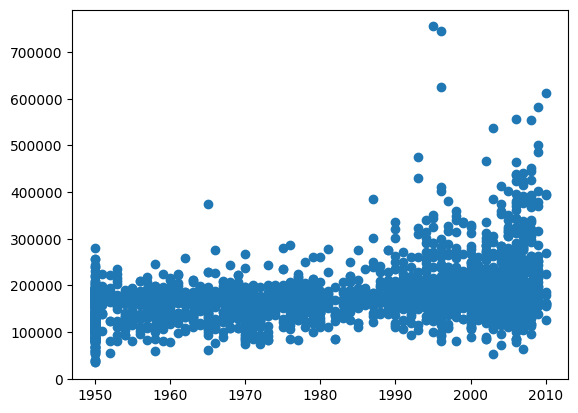

In [388]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=combined_data)

In [389]:
combined_data.query('YearRemodAdd < 1970 & SalePrice > 300000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
313          20       RL        150.0   215245   Pave      IR3         Low   

    Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
313    AllPub    Inside       Sev  ...             0         0           0   

    PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
313        0       0       6    2009        WD         Normal  375000.0  

[1 rows x 73 columns]

In [390]:
outliers.append(313)

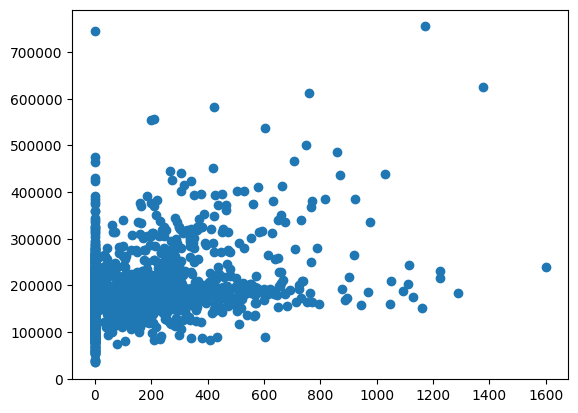

In [391]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=combined_data)

In [392]:
combined_data.query('MasVnrArea > 1500')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
297          60       FV         66.0     7399   Pave      IR1         Lvl   

    Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
297    AllPub    Inside       Gtl  ...             0         0         198   

    PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
297        0       0       6    2007        WD         Normal  239000.0  

[1 rows x 73 columns]

In [393]:
outliers.append(297)

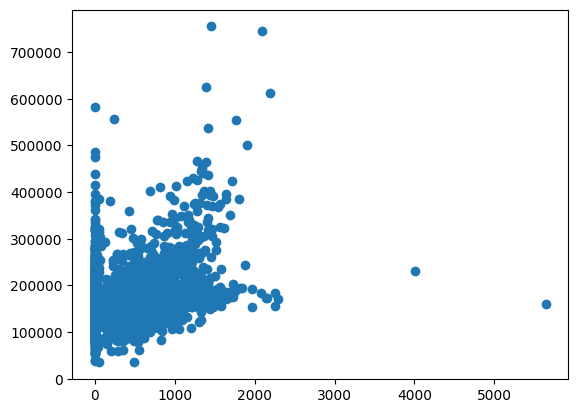

In [394]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=combined_data)

In [395]:
combined_data.query('BsmtFinSF1 > 5000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1298          60       RL        313.0    63887   Pave      IR3         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1298    AllPub    Corner       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
1298      480       0       1    2008       New        Partial  160000.0  

[1 rows x 73 columns]

In [396]:
outliers.append(1298)

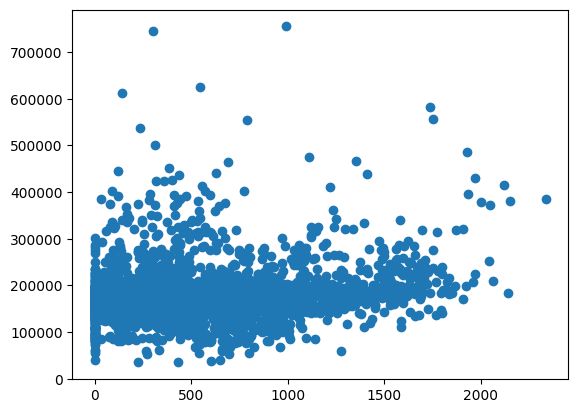

In [397]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=combined_data)

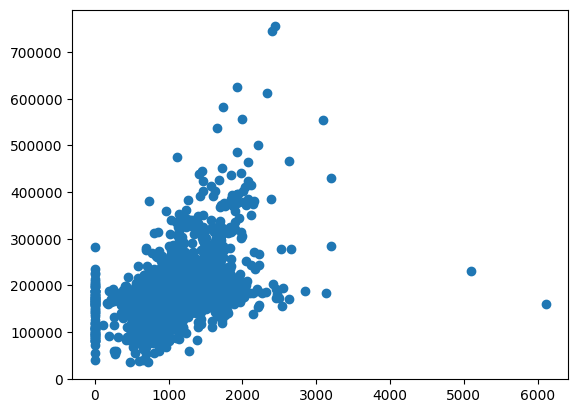

In [398]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=combined_data)

In [399]:
combined_data.query('TotalBsmtSF > 5000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1298          60       RL        313.0    63887   Pave      IR3         Bnk   
2549          20       RL        128.0    39290   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
1298    AllPub    Corner       Gtl  ...             0         0           0   
2549    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition      SalePrice  
1298      480       0       1    2008       New        Partial  160000.000000  
2549        0   17000      10    2007       New        Partial  230841.338626  

[2 rows x 73 columns]

In [400]:
outliers.append(1298)
outliers.append(2549)

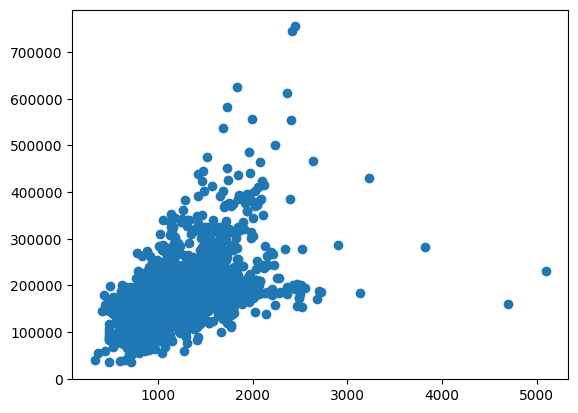

In [401]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=combined_data)

In [402]:
combined_data.query('`1stFlrSF` > 5000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
2549          20       RL        128.0    39290   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
2549    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition      SalePrice  
2549        0   17000      10    2007       New        Partial  230841.338626  

[1 rows x 73 columns]

In [403]:
outliers.append(2549)

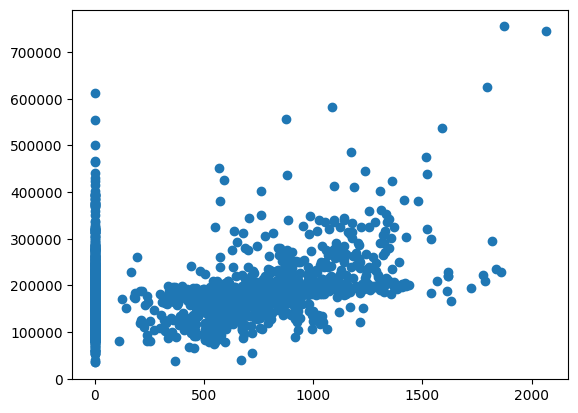

In [404]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=combined_data)

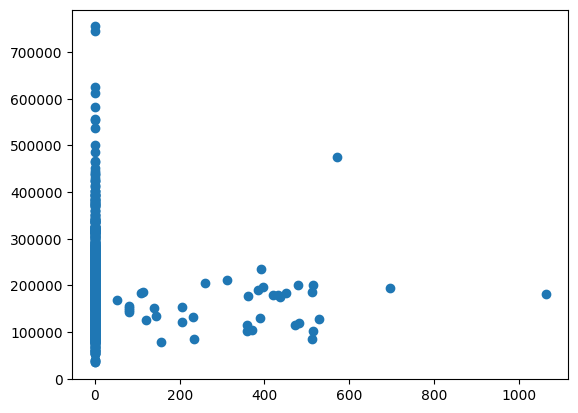

In [405]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=combined_data)

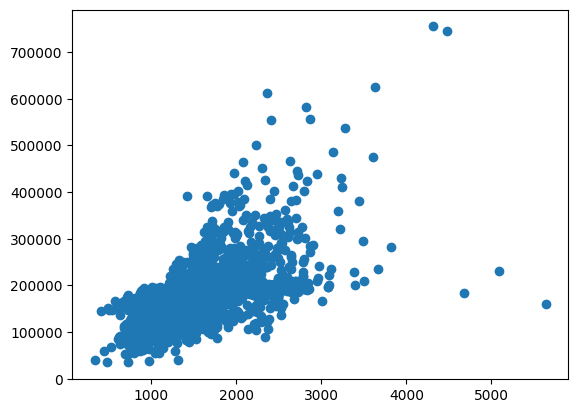

In [406]:
plt.scatter(x='GrLivArea', y='SalePrice', data=combined_data)

In [407]:
combined_data.query('GrLivArea > 4500')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
523           60       RL        130.0    40094   Pave      IR1         Bnk   
1298          60       RL        313.0    63887   Pave      IR3         Bnk   
2549          20       RL        128.0    39290   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
523     AllPub    Inside       Gtl  ...             0         0           0   
1298    AllPub    Corner       Gtl  ...             0         0           0   
2549    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition      SalePrice  
523         0       0      10    2007       New        Partial  184750.000000  
1298      480       0       1    2008       New        Partial  160000.000000  
2549        0   17000      10    2007       New        Partial  230841.338626  

[3 rows x 73 columns]

In [408]:
outliers.append(523)
outliers.append(1298)
outliers.append(2549)

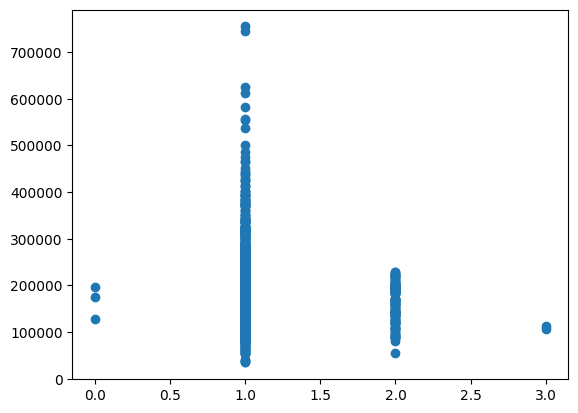

In [409]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=combined_data)

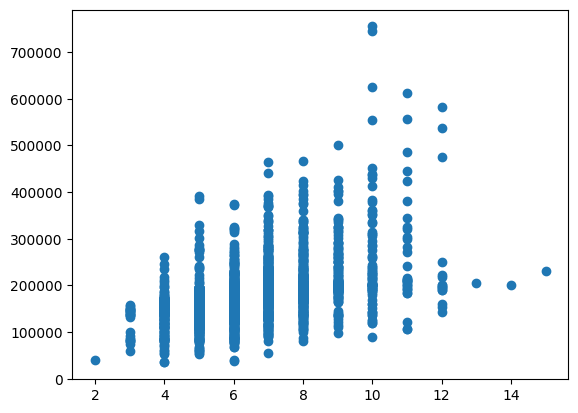

In [410]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=combined_data)

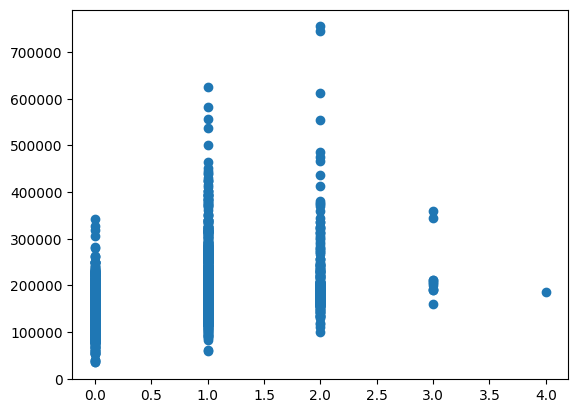

In [411]:
plt.scatter(x='Fireplaces', y='SalePrice', data=combined_data)

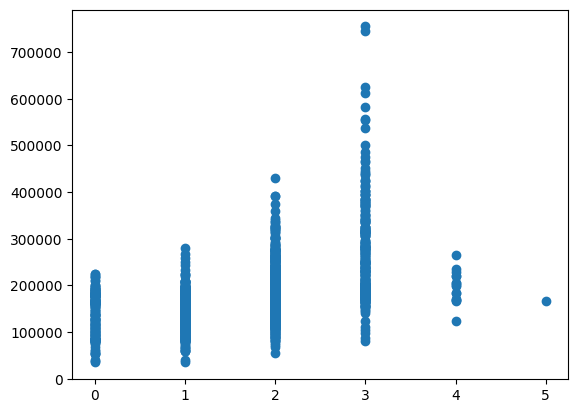

In [412]:
plt.scatter(x='GarageCars', y='SalePrice', data=combined_data)

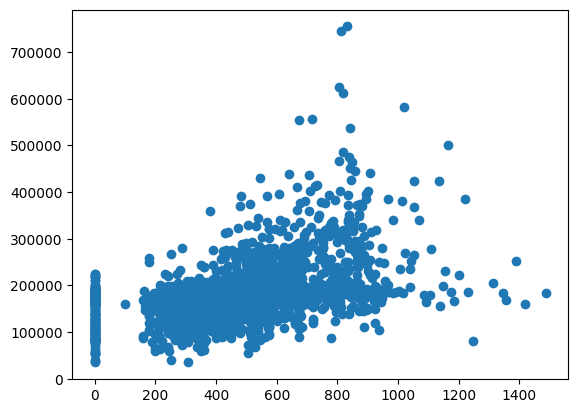

In [413]:
plt.scatter(x='GarageArea', y='SalePrice', data=combined_data)

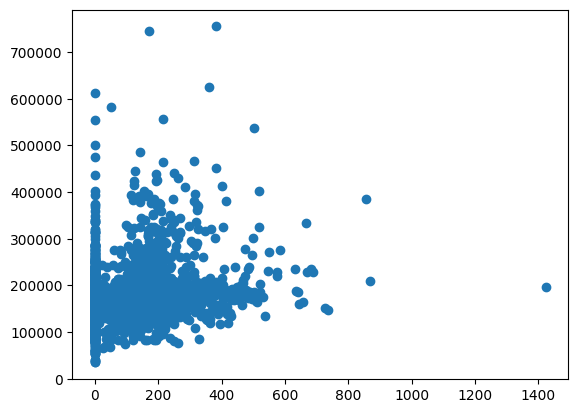

In [414]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=combined_data)

In [415]:
combined_data.query('WoodDeckSF > 1400')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
2606          80       RL         68.0    15957   Pave      IR1         Low   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
2606    AllPub    Corner       Mod  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition      SalePrice  
2606        0       0       9    2007        WD         Normal  197092.087338  

[1 rows x 73 columns]

In [416]:
outliers.append(2606)

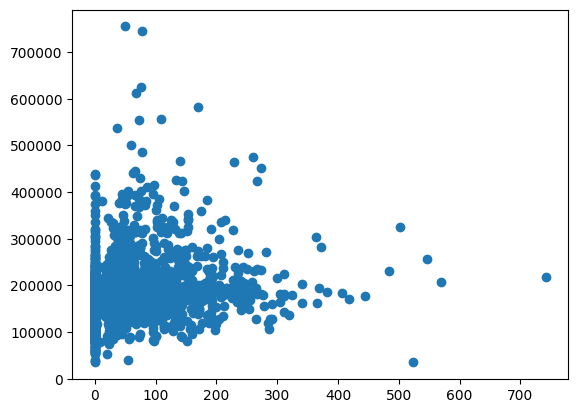

In [417]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=combined_data)

In [418]:
combined_data.query('OpenPorchSF > 700')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
2557          90       RL         60.0    10890   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
2557    AllPub    Inside       Gtl  ...           240         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition     SalePrice  
2557        0    1512       1    2007        WD        AdjLand  218108.53677  

[1 rows x 73 columns]

In [419]:
outliers.append(2557)

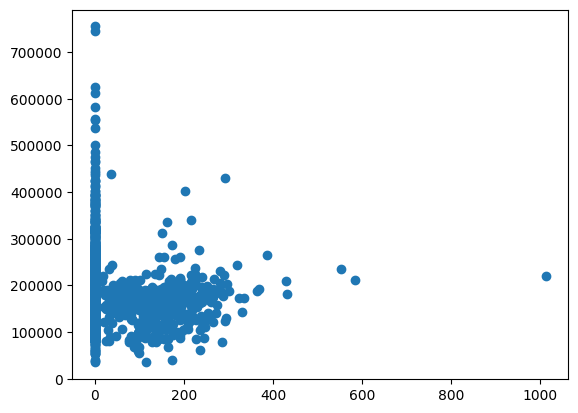

In [420]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=combined_data)

In [421]:
combined_data.query('EnclosedPorch > 500')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
197           75       RL        174.0    25419   Pave      Reg         Lvl   
2503          50       RL        104.0    23920   Pave      Reg         Lvl   
2567          20       RL         68.0    25485   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
197     AllPub    Corner       Gtl  ...           552         0           0   
2503    AllPub    Inside       Gtl  ...          1012         0           0   
2567    AllPub   CulDSac       Gtl  ...           584         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition      SalePrice  
197       512       0       3    2006        WD        Abnorml  235000.000000  
2503      444       0       4    2007        WD         Normal  220514.994000  
2567        0       0       5    2007        WD         Normal  211423.986511  

[3 rows x 73 columns]

In [422]:
outliers.append(2503)

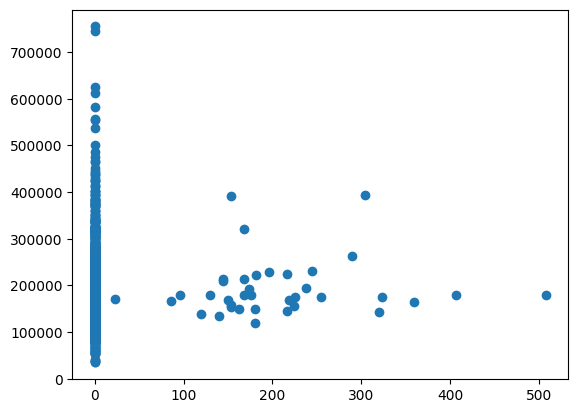

In [423]:
plt.scatter(x='3SsnPorch', y='SalePrice', data=combined_data)

In [424]:
combined_data.query('`3SsnPorch` > 350')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
55            20       RL        100.0    10175   Pave      IR1         Lvl   
205           20       RL         99.0    11851   Pave      Reg         Lvl   
1755          20       RL         60.0     7436   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
55      AllPub    Inside       Gtl  ...             0       407           0   
205     AllPub    Corner       Gtl  ...             0       508           0   
1755    AllPub    Inside       Gtl  ...             0       360           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition      SalePrice  
55          0       0       7    2008        WD         Normal  180500.000000  
205         0       0       5    2009        WD         Normal  180500.000000  
1755        0       0       8    2009        WD         Normal  164146.306037  

[3 rows x 73 columns]

In [425]:
outliers.append(205)
outliers.append(55)
outliers.append(1755)

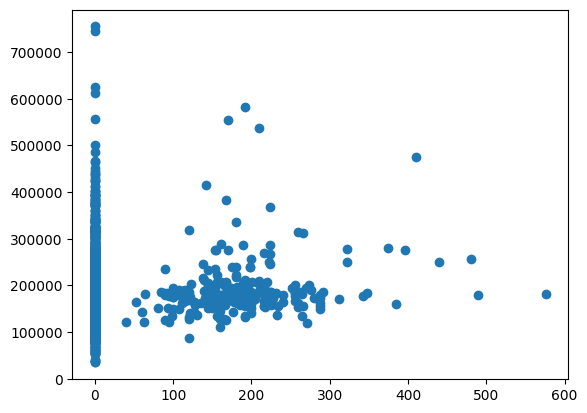

In [426]:
plt.scatter(x='ScreenPorch', y='SalePrice', data=combined_data)

In [427]:
combined_data.query('ScreenPorch > 500')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
2152          20       RL         68.0     9571   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
2152    AllPub    Inside       Gtl  ...             0         0         576   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition      SalePrice  
2152        0       0       7    2008        WD         Normal  181416.732376  

[1 rows x 73 columns]

In [428]:
outliers.append(2152)

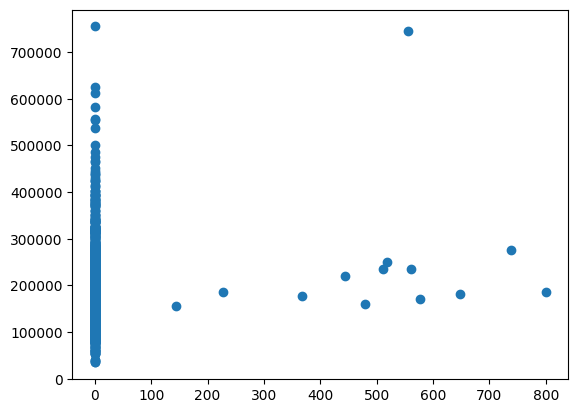

In [429]:
plt.scatter(x='PoolArea', y='SalePrice', data=combined_data)

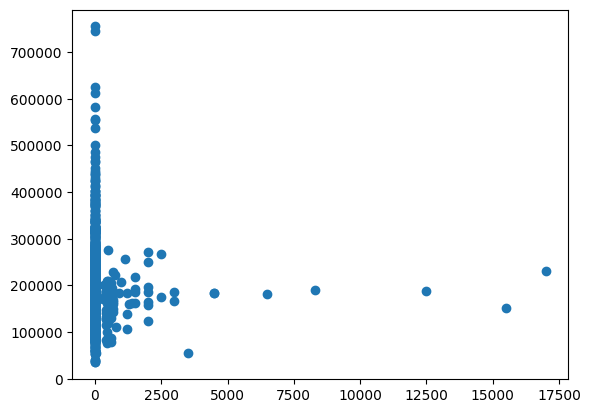

In [430]:
plt.scatter(x='MiscVal', y='SalePrice', data=combined_data)

In [431]:
combined_data.query('MiscVal > 10000')

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
346           20       RL         68.0    12772   Pave      IR1         Lvl   
1461          20       RL         81.0    14267   Pave      IR1         Lvl   
2549          20       RL        128.0    39290   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
346     AllPub   CulDSac       Gtl  ...             0         0           0   
1461    AllPub    Corner       Gtl  ...             0         0           0   
2549    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition      SalePrice  
346         0   15500       4    2007        WD         Normal  151500.000000  
1461        0   12500       6    2010        WD         Normal  187758.393989  
2549        0   17000      10    2007       New        Partial  230841.338626  

[3 rows x 73 columns]

In [432]:
outliers.append(346)
outliers.append(1461)
outliers.append(2549)

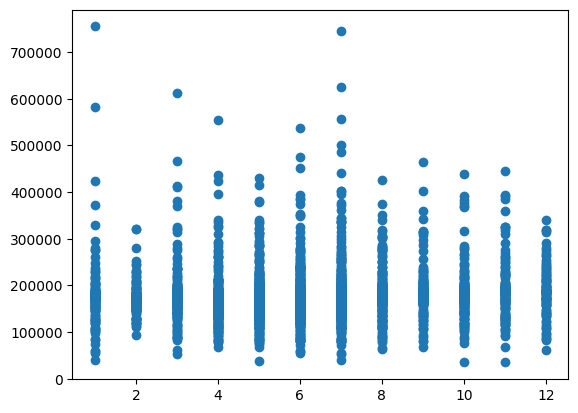

In [433]:
plt.scatter(x='MoSold', y='SalePrice', data=combined_data)

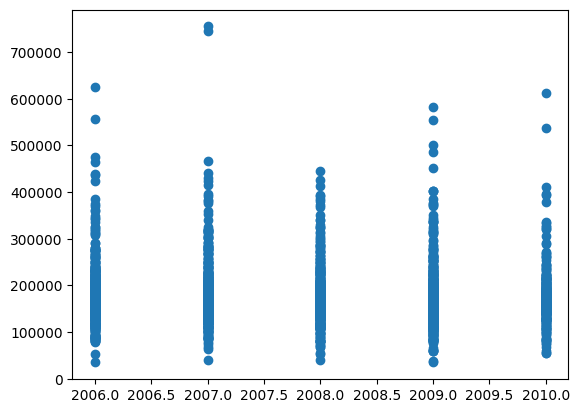

In [434]:
plt.scatter(x='YrSold', y='SalePrice', data=combined_data)

In [435]:
outliers_set = set(outliers)

# Convert the set back to a list
outliers_list = list(outliers_set)

In [436]:
combined_data.drop(index=outliers_list, inplace=True)

In [437]:
combined_data.shape

(2897, 73)

In [438]:
#feature Engineering

In [439]:
#new columns to handle year
current_year = 2024  # Update as necessary
combined_data['AgeBuilt'] = current_year - combined_data['YearBuilt']
combined_data['AgeRemod'] = current_year - combined_data['YearRemodAdd']

In [440]:
combined_data['totalsf'] = combined_data['1stFlrSF'] + combined_data['2ndFlrSF'] + combined_data['BsmtFinSF1']

In [441]:
combined_data['totalarea'] = combined_data['GrLivArea'] + combined_data['TotalBsmtSF']

In [442]:
combined_data['totalbaths'] = combined_data['BsmtFullBath'] + combined_data['FullBath'] + 0.5 * (combined_data['BsmtHalfBath'] + combined_data['HalfBath'])

In [443]:
combined_data['totalporchsf'] = combined_data['OpenPorchSF'] + combined_data['3SsnPorch'] + combined_data['EnclosedPorch'] + combined_data['ScreenPorch'] + combined_data['WoodDeckSF']

In [444]:
combined_data = combined_data.drop(columns=['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF'
                                           , 'BsmtFullBath', 'FullBath', 'BsmtHalfBath', 'HalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch',
                                            'ScreenPorch', 'WoodDeckSF'])

In [445]:
combined_data.shape

(2897, 63)

In [446]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 2918
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2897 non-null   int64  
 1   MSZoning       2897 non-null   object 
 2   LotFrontage    2897 non-null   float64
 3   LotArea        2897 non-null   int64  
 4   Street         2897 non-null   object 
 5   LotShape       2897 non-null   object 
 6   LandContour    2897 non-null   object 
 7   Utilities      2897 non-null   object 
 8   LotConfig      2897 non-null   object 
 9   LandSlope      2897 non-null   object 
 10  Neighborhood   2897 non-null   object 
 11  Condition1     2897 non-null   object 
 12  Condition2     2897 non-null   object 
 13  BldgType       2897 non-null   object 
 14  HouseStyle     2897 non-null   object 
 15  OverallQual    2897 non-null   int64  
 16  OverallCond    2897 non-null   int64  
 17  RoofStyle      2897 non-null   object 
 18  RoofMatl     

In [447]:
combined_data['totalcondition'] = combined_data['Condition1'] + combined_data['Condition2']

In [448]:
combined_data['ExteriorCovering'] = combined_data['Exterior1st'] + combined_data['Exterior2nd']

In [449]:
combined_data['OverallQuality_Condition'] = combined_data['OverallQual'] + combined_data['OverallCond']

In [450]:
combined_data['ExteriorQuality_Condition'] = combined_data['ExterQual'] + combined_data['ExterCond']

In [451]:
combined_data['BasementQuality_Condition'] = combined_data['BsmtQual'] + combined_data['BsmtCond']

In [452]:
combined_data['GarageQuality&Condition'] = combined_data['GarageQual'] + combined_data['GarageCond']

In [453]:
combined_data = combined_data.drop(columns=['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd', 'OverallQual', 'OverallCond', 'ExterQual'
                                           , 'ExterCond', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 'GarageCars'])

In [454]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 2918
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MSSubClass                 2897 non-null   int64  
 1   MSZoning                   2897 non-null   object 
 2   LotFrontage                2897 non-null   float64
 3   LotArea                    2897 non-null   int64  
 4   Street                     2897 non-null   object 
 5   LotShape                   2897 non-null   object 
 6   LandContour                2897 non-null   object 
 7   Utilities                  2897 non-null   object 
 8   LotConfig                  2897 non-null   object 
 9   LandSlope                  2897 non-null   object 
 10  Neighborhood               2897 non-null   object 
 11  BldgType                   2897 non-null   object 
 12  HouseStyle                 2897 non-null   object 
 13  RoofStyle                  2897 non-null   object 
 1

In [455]:
combined_data = combined_data.drop(columns=['LowQualFinSF'])

In [456]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2897 entries, 0 to 2918
Data columns (total 55 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MSSubClass                 2897 non-null   int64  
 1   MSZoning                   2897 non-null   object 
 2   LotFrontage                2897 non-null   float64
 3   LotArea                    2897 non-null   int64  
 4   Street                     2897 non-null   object 
 5   LotShape                   2897 non-null   object 
 6   LandContour                2897 non-null   object 
 7   Utilities                  2897 non-null   object 
 8   LotConfig                  2897 non-null   object 
 9   LandSlope                  2897 non-null   object 
 10  Neighborhood               2897 non-null   object 
 11  BldgType                   2897 non-null   object 
 12  HouseStyle                 2897 non-null   object 
 13  RoofStyle                  2897 non-null   object 
 1

In [457]:
numerical_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('SalePrice')
categorical_columns = combined_data.select_dtypes(include=['object']).columns.tolist()

In [458]:
categorical_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'totalcondition',
 'ExteriorCovering',
 'ExteriorQuality_Condition',
 'BasementQuality_Condition',
 'GarageQuality&Condition']

In [459]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Define the numerical columns excluding 'SalePrice'
numerical_columns = combined_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('SalePrice')

# Normalize the numerical columns (excluding SalePrice)
combined_data[numerical_columns] = scaler.fit_transform(combined_data[numerical_columns])
fited_Scalar = scaler.fit_transform(combined_data[numerical_columns])
# SalePrice remains unchanged


In [460]:
fited_Scalar

array([[0.23529412, 0.24581006, 0.10293546, ..., 0.41666667, 0.05231561,
        0.58823529],
       [0.        , 0.32960894, 0.11949151, ..., 0.25      , 0.25557461,
        0.70588235],
       [0.23529412, 0.26256983, 0.14324585, ..., 0.41666667, 0.03602058,
        0.58823529],
       ...,
       [0.        , 0.77653631, 0.26921582, ..., 0.16666667, 0.40651801,
        0.58823529],
       [0.38235294, 0.22905028, 0.13159903, ..., 0.08333333, 0.09605489,
        0.47058824],
       [0.23529412, 0.29608939, 0.11988022, ..., 0.25      , 0.20411664,
        0.58823529]])

In [461]:
combined_data

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0       0.235294       RL     0.245810  0.102935   Pave      Reg         Lvl   
1       0.000000       RL     0.329609  0.119492   Pave      Reg         Lvl   
2       0.235294       RL     0.262570  0.143246   Pave      IR1         Lvl   
3       0.294118       RL     0.217877  0.118772   Pave      IR1         Lvl   
4       0.235294       RL     0.351955  0.186580   Pave      IR1         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
2914    0.823529       RM     0.000000  0.009156   Pave      Reg         Lvl   
2915    0.823529       RM     0.000000  0.008552   Pave      Reg         Lvl   
2916    0.000000       RL     0.776536  0.269216   Pave      Reg         Lvl   
2917    0.382353       RL     0.229050  0.131599   Pave      Reg         Lvl   
2918    0.235294       RL     0.296089  0.119880   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ...   totalsf totalarea totalbaths  \
0       AllPub    Inside       Gtl  ...  0.449870  0.366262   0.416667   
1       AllPub       FR2       Gtl  ...  0.411841  0.359370   0.250000   
2       AllPub    Inside       Gtl  ...  0.418755  0.389235   0.416667   
3       AllPub    Corner       Gtl  ...  0.345506  0.351001   0.166667   
4       AllPub       FR2       Gtl  ...  0.544296  0.493764   0.416667   
...        ...       ...       ...  ...       ...       ...        ...   
2914    AllPub    Inside       Gtl  ...  0.163786  0.213981   0.083333   
2915    AllPub    Inside       Gtl  ...  0.218237  0.213981   0.083333   
2916    AllPub    Inside       Gtl  ...  0.456785  0.346899   0.166667   
2917    AllPub    Inside       Gtl  ...  0.210242  0.254020   0.083333   
2918    AllPub    Inside       Mod  ...  0.523768  0.436823   0.250000   

     totalporchsf totalcondition ExteriorCovering  OverallQuality_Condition  \
0        0.052316       NormNorm   VinylSdVinylSd                  0.588235   
1        0.255575      FeedrNorm   MetalSdMetalSd                  0.705882   
2        0.036021       NormNorm   VinylSdVinylSd                  0.588235   
3        0.263293       NormNorm   Wd SdngWd Shng                  0.588235   
4        0.236707       NormNorm   VinylSdVinylSd                  0.647059   
...           ...            ...              ...                       ...   
2914     0.000000       NormNorm   CemntBdCmentBd                  0.529412   
2915     0.020583       NormNorm   CemntBdCmentBd                  0.411765   
2916     0.406518       NormNorm   VinylSdVinylSd                  0.588235   
2917     0.096055       NormNorm   HdBoardWd Shng                  0.470588   
2918     0.204117       NormNorm   HdBoardHdBoard                  0.588235   

     ExteriorQuality_Condition BasementQuality_Condition  \
0                         GdTA                      GdTA   
1                         TATA                      GdTA   
2                         GdTA                      GdTA   
3                         TATA                      TAGd   
4                         GdTA                      GdTA   
...                        ...                       ...   
2914                      TATA                      TATA   
2915                      TATA                      TATA   
2916                      TATA                      TATA   
2917                      TATA                      GdTA   
2918                      TATA                      GdTA   

     GarageQuality&Condition  
0                       TATA  
1                       TATA  
2                       TATA  
3                       TATA  
4                       TATA  
...                      ...  
2914                    NoNo  
2915                    TATA  
2916                    TATA  
2917                    NoNo  
2918                    TATA  

[2897 rows x 55 columns]

In [462]:
combined_data['Street'].unique()


array(['Pave', 'Grvl'], dtype=object)

In [463]:
#converting categorical columns to numerical

from sklearn.preprocessing import LabelEncoder

# Initialize label encoders dictionary
label_encoders = {}

# Apply label encoding to each categorical column
for col in categorical_columns:
    # Create a new LabelEncoder instance for each column
    le = LabelEncoder()
    
    # Fit and transform the column data
    combined_data[col] = le.fit_transform(combined_data[col].astype(str))
    
    # Store the fitted label encoder for future use
    label_encoders[col] = le

# Check the unique classes for each column after encoding
for col, le in label_encoders.items():
    print(f"{col}: {le.classes_}")  # Print unique classes for each column


MSZoning: ['C (all)' 'FV' 'RH' 'RL' 'RM']
Street: ['Grvl' 'Pave']
LotShape: ['IR1' 'IR2' 'IR3' 'Reg']
LandContour: ['Bnk' 'HLS' 'Low' 'Lvl']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle: ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
RoofStyle: ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
RoofMatl: ['CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake' 'WdShngl']
MasVnrType: ['BrkCmn' 'BrkFace' 'No' 'Stone']
Foundation: ['BrkTil' 'CBlock' 'PConc' 'Slab' 'Stone' 'Wood']
BsmtExposure: ['Av' 'Gd' 'Mn' 'No']
BsmtFinType1: ['ALQ' 'BLQ' 'GLQ' 'LwQ' 'No' 'Rec' 'Unf']
Heating

In [464]:
categorical_columns = [
    "KitchenQual",
    "GarageType",
    "GarageFinish",
    "ExteriorQuality_Condition",
    "BasementQuality_Condition"
]

filtered_label_encoders = {col: label_encoders[col] for col in categorical_columns if col in label_encoders}

In [465]:
for col, le in filtered_label_encoders.items():
    print(f"{col}: {le.classes_}") 

KitchenQual: ['Ex' 'Fa' 'Gd' 'TA']
GarageType: ['2Types' 'Attchd' 'Basment' 'BuiltIn' 'CarPort' 'Detchd' 'No']
GarageFinish: ['Fin' 'No' 'RFn' 'Unf']
ExteriorQuality_Condition: ['ExEx' 'ExGd' 'ExTA' 'FaFa' 'FaGd' 'FaPo' 'FaTA' 'GdEx' 'GdFa' 'GdGd'
 'GdTA' 'TAEx' 'TAFa' 'TAGd' 'TAPo' 'TATA']
BasementQuality_Condition: ['ExGd' 'ExPo' 'ExTA' 'FaFa' 'FaGd' 'FaPo' 'FaTA' 'GdFa' 'GdGd' 'GdNo'
 'GdTA' 'NoFa' 'NoNo' 'NoTA' 'TAFa' 'TAGd' 'TANo' 'TAPo' 'TATA']


In [466]:
# import pickle
# pickle.dump(filtered_label_encoders, open('filtered_label_encoders.pkl', 'wb'))


In [467]:
combined_data

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0       0.235294         3     0.245810  0.102935       1         3   
1       0.000000         3     0.329609  0.119492       1         3   
2       0.235294         3     0.262570  0.143246       1         0   
3       0.294118         3     0.217877  0.118772       1         0   
4       0.235294         3     0.351955  0.186580       1         0   
...          ...       ...          ...       ...     ...       ...   
2914    0.823529         4     0.000000  0.009156       1         3   
2915    0.823529         4     0.000000  0.008552       1         3   
2916    0.000000         3     0.776536  0.269216       1         3   
2917    0.382353         3     0.229050  0.131599       1         3   
2918    0.235294         3     0.296089  0.119880       1         3   

      LandContour  Utilities  LotConfig  LandSlope  ...   totalsf  totalarea  \
0               3          0          4          0  ...  0.449870   0.366262   
1               3          0          2          0  ...  0.411841   0.359370   
2               3          0          4          0  ...  0.418755   0.389235   
3               3          0          0          0  ...  0.345506   0.351001   
4               3          0          2          0  ...  0.544296   0.493764   
...           ...        ...        ...        ...  ...       ...        ...   
2914            3          0          4          0  ...  0.163786   0.213981   
2915            3          0          4          0  ...  0.218237   0.213981   
2916            3          0          4          0  ...  0.456785   0.346899   
2917            3          0          4          0  ...  0.210242   0.254020   
2918            3          0          4          1  ...  0.523768   0.436823   

      totalbaths  totalporchsf  totalcondition  ExteriorCovering  \
0       0.416667      0.052316               9                67   
1       0.250000      0.255575               5                38   
2       0.416667      0.036021               9                67   
3       0.166667      0.263293               9                80   
4       0.416667      0.236707               9                67   
...          ...           ...             ...               ...   
2914    0.083333      0.000000               9                22   
2915    0.083333      0.020583               9                22   
2916    0.166667      0.406518               9                67   
2917    0.083333      0.096055               9                33   
2918    0.250000      0.204117               9                27   

      OverallQuality_Condition  ExteriorQuality_Condition  \
0                     0.588235                         10   
1                     0.705882                         15   
2                     0.588235                         10   
3                     0.588235                         15   
4                     0.647059                         10   
...                        ...                        ...   
2914                  0.529412                         15   
2915                  0.411765                         15   
2916                  0.588235                         15   
2917                  0.470588                         15   
2918                  0.588235                         15   

      BasementQuality_Condition  GarageQuality&Condition  
0                            10                       13  
1                            10                       13  
2                            10                       13  
3                            15                       13  
4                            10                       13  
...                         ...                      ...  
2914                         18                        7  
2915                         18                       13  
2916                         18                       13  
2917                         10                     

In [468]:
combined_data['SalePrice']

0       208500.000000
1       181500.000000
2       223500.000000
3       140000.000000
4       250000.000000
            ...      
2914    167081.220949
2915    164788.778231
2916    219222.423400
2917    184924.279659
2918    187741.866657
Name: SalePrice, Length: 2897, dtype: float64

In [469]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a correlation matrix for the heatmap
corr_matrix = combined_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(100, 100))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Dataset Correlations')
plt.show()

In [470]:
saleprice_correlation = corr_matrix['SalePrice']

# Step 3: Filter the correlation values (above 0.3 or below -0.3) and exclude 'SalePrice' itself
high_correlation = saleprice_correlation[(saleprice_correlation > 0.3) | (saleprice_correlation < -0.3)]

# Step 4: Display the attributes with correlation > 0.3 or < -0.3
print(high_correlation)

LotArea                      0.357808
MasVnrArea                   0.341570
KitchenQual                 -0.415617
TotRmsAbvGrd                 0.471396
Fireplaces                   0.348730
GarageType                  -0.313702
GarageFinish                -0.305040
GarageArea                   0.474702
SalePrice                    1.000000
AgeBuilt                    -0.381452
AgeRemod                    -0.364826
totalsf                      0.572957
totalarea                    0.631088
totalbaths                   0.460351
OverallQuality_Condition     0.406702
ExteriorQuality_Condition   -0.425514
BasementQuality_Condition   -0.396493
Name: SalePrice, dtype: float64


In [471]:
selected_columns = [
    'LotArea',
    'MasVnrArea',
    'KitchenQual',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageType',
    'GarageFinish',
    'GarageArea',
    'SalePrice',
    'AgeBuilt',
    'AgeRemod',
    'totalsf',
    'totalarea',
    'totalbaths',
    'OverallQuality_Condition',
    'ExteriorQuality_Condition',
    'BasementQuality_Condition'
]

new_data = combined_data[selected_columns]


In [472]:
new_data

LotArea  MasVnrArea  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageType  \
0     0.102935    0.151938            2      0.500000        0.00           1   
1     0.119492    0.000000            3      0.333333        0.25           1   
2     0.143246    0.125581            2      0.333333        0.25           1   
3     0.118772    0.000000            2      0.416667        0.25           5   
4     0.186580    0.271318            2      0.583333        0.25           1   
...        ...         ...          ...           ...         ...         ...   
2914  0.009156    0.000000            3      0.250000        0.00           6   
2915  0.008552    0.000000            3      0.333333        0.00           4   
2916  0.269216    0.000000            3      0.416667        0.25           5   
2917  0.131599    0.000000            3      0.333333        0.00           6   
2918  0.119880    0.072868            3      0.583333        0.25           1   

      GarageFinish  GarageArea      SalePrice  AgeBuilt  AgeRemod   totalsf  \
0                2    0.368280  208500.000000  0.050725  0.116667  0.449870   
1                2    0.309140  181500.000000  0.246377  0.566667  0.411841   
2                2    0.408602  223500.000000  0.065217  0.133333  0.418755   
3                3    0.431452  140000.000000  0.688406  0.666667  0.345506   
4                2    0.561828  250000.000000  0.072464  0.166667  0.544296   
...            ...         ...            ...       ...       ...       ...   
2914             1    0.000000  167081.220949  0.289855  0.666667  0.163786   
2915             3    0.192204  164788.778231  0.289855  0.666667  0.218237   
2916             3    0.387097  219222.423400  0.362319  0.233333  0.456785   
2917             1    0.000000  184924.279659  0.130435  0.300000  0.210242   
2918             0    0.436828  187741.866657  0.123188  0.266667  0.523768   

      totalarea  totalbaths  OverallQuality_Condition  \
0      0.366262    0.416667                  0.588235   
1      0.359370    0.250000                  0.705882   
2      0.389235    0.416667                  0.588235   
3      0.351001    0.166667                  0.588235   
4      0.493764    0.416667                  0.647059   
...         ...         ...                       ...   
2914   0.213981    0.083333                  0.529412   
2915   0.213981    0.083333                  0.411765   
2916   0.346899    0.166667                  0.588235   
2917   0.254020    0.083333                  0.470588   
2918   0.436823    0.250000                  0.588235   

      ExteriorQuality_Condition  BasementQuality_Condition  
0                            10                         10  
1                            15                         10  
2                            10                         10  
3                            15                         15  
4                            10                         10  
...                         ...                        ...  
2914                         15                         18  
2915                         15                         18  
2916                         15                         18  
2917                         15                         10  
2918                         15                         10  

[2897 rows x 17 columns]

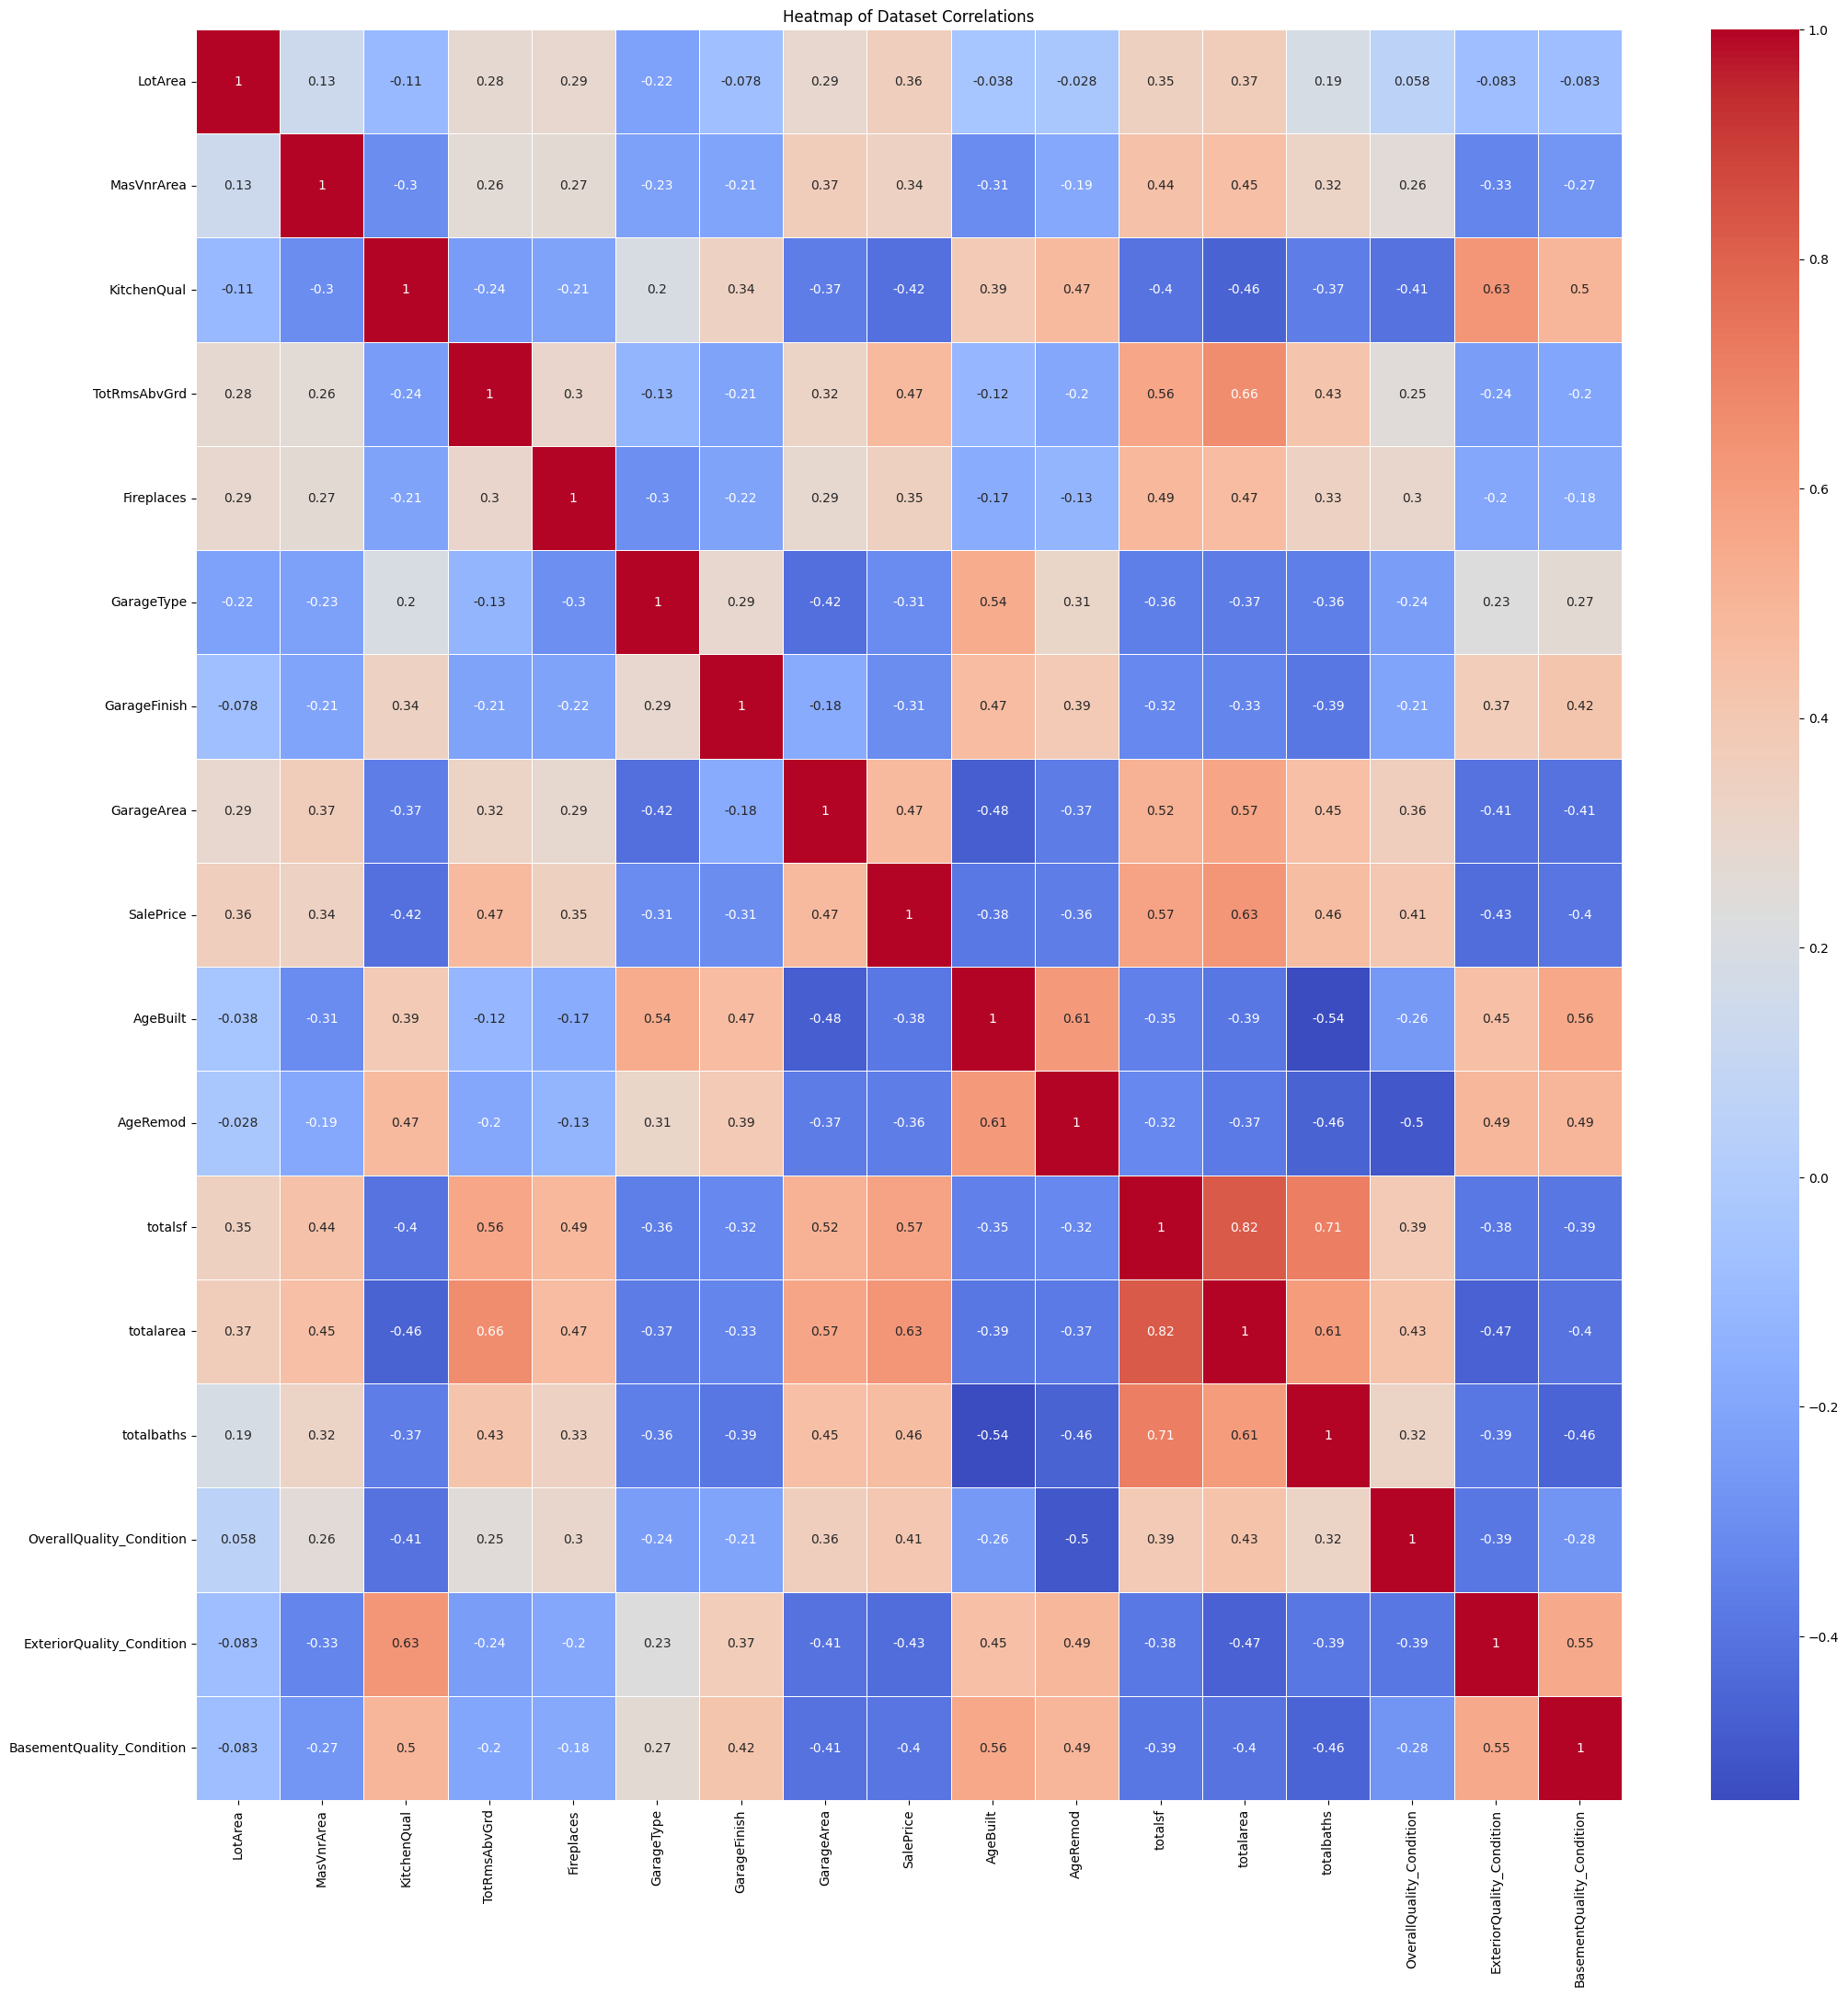

In [473]:
# Generate a correlation matrix for the heatmap
corr_matrix = new_data.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Dataset Correlations')
plt.show()

In [474]:
linear_regression_data = new_data.copy()

In [475]:
linear_regression_data

LotArea  MasVnrArea  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageType  \
0     0.102935    0.151938            2      0.500000        0.00           1   
1     0.119492    0.000000            3      0.333333        0.25           1   
2     0.143246    0.125581            2      0.333333        0.25           1   
3     0.118772    0.000000            2      0.416667        0.25           5   
4     0.186580    0.271318            2      0.583333        0.25           1   
...        ...         ...          ...           ...         ...         ...   
2914  0.009156    0.000000            3      0.250000        0.00           6   
2915  0.008552    0.000000            3      0.333333        0.00           4   
2916  0.269216    0.000000            3      0.416667        0.25           5   
2917  0.131599    0.000000            3      0.333333        0.00           6   
2918  0.119880    0.072868            3      0.583333        0.25           1   

      GarageFinish  GarageArea      SalePrice  AgeBuilt  AgeRemod   totalsf  \
0                2    0.368280  208500.000000  0.050725  0.116667  0.449870   
1                2    0.309140  181500.000000  0.246377  0.566667  0.411841   
2                2    0.408602  223500.000000  0.065217  0.133333  0.418755   
3                3    0.431452  140000.000000  0.688406  0.666667  0.345506   
4                2    0.561828  250000.000000  0.072464  0.166667  0.544296   
...            ...         ...            ...       ...       ...       ...   
2914             1    0.000000  167081.220949  0.289855  0.666667  0.163786   
2915             3    0.192204  164788.778231  0.289855  0.666667  0.218237   
2916             3    0.387097  219222.423400  0.362319  0.233333  0.456785   
2917             1    0.000000  184924.279659  0.130435  0.300000  0.210242   
2918             0    0.436828  187741.866657  0.123188  0.266667  0.523768   

      totalarea  totalbaths  OverallQuality_Condition  \
0      0.366262    0.416667                  0.588235   
1      0.359370    0.250000                  0.705882   
2      0.389235    0.416667                  0.588235   
3      0.351001    0.166667                  0.588235   
4      0.493764    0.416667                  0.647059   
...         ...         ...                       ...   
2914   0.213981    0.083333                  0.529412   
2915   0.213981    0.083333                  0.411765   
2916   0.346899    0.166667                  0.588235   
2917   0.254020    0.083333                  0.470588   
2918   0.436823    0.250000                  0.588235   

      ExteriorQuality_Condition  BasementQuality_Condition  
0                            10                         10  
1                            15                         10  
2                            10                         10  
3                            15                         15  
4                            10                         10  
...                         ...                        ...  
2914                         15                         18  
2915                         15                         18  
2916                         15                         18  
2917                         15                         10  
2918                         15                         10  

[2897 rows x 17 columns]

<Axes: xlabel='SalePrice', ylabel='Count'>

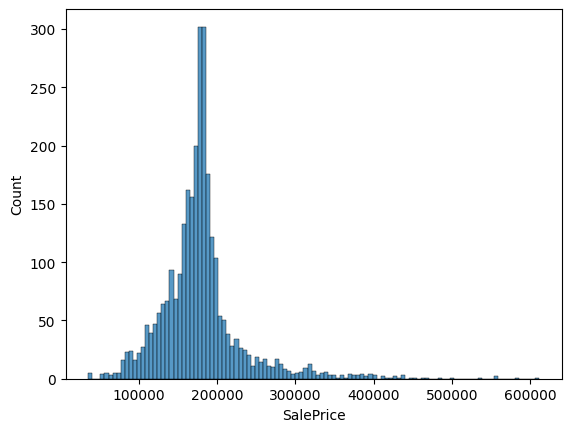

In [476]:
sns.histplot(
    linear_regression_data,
    x=linear_regression_data['SalePrice']
)

In [477]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with a 'SalePrice' column
# Example DataFrame (you can replace it with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = linear_regression_data['SalePrice'].quantile(0.25)
Q3 = linear_regression_data['SalePrice'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = linear_regression_data[(linear_regression_data['SalePrice'] < lower_bound) | (linear_regression_data['SalePrice'] > upper_bound)]

# Print the outlier points
print(outliers.shape)



(340, 17)


In [478]:
linear_regression_data.shape

(2897, 17)

In [479]:
linear_regression_data['SalePrice'] = np.log1p(linear_regression_data['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

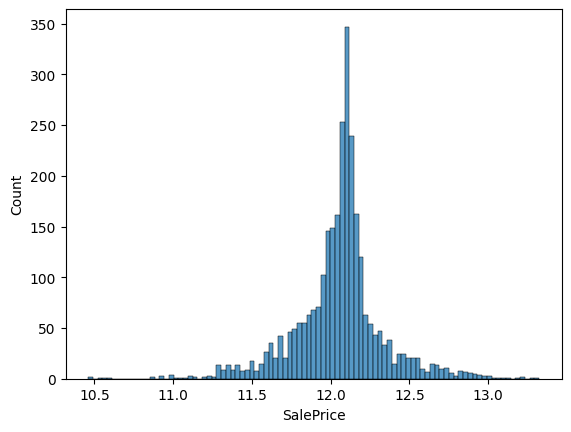

In [480]:
sns.histplot(
    linear_regression_data,
    x=linear_regression_data['SalePrice']
)

In [481]:
from sklearn.model_selection import train_test_split

# Assuming 'cleaned_data' is your DataFrame and 'SalePrice' is your target variable

# Define the features and target variable
X_linear_regression = linear_regression_data.drop(columns=['SalePrice'])  # Features (all columns except SalePrice)
Y_linear_regression = linear_regression_data['SalePrice']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train_linear_regression, X_test_linear_regression, y_train_linear_regression, y_test_linear_regression = train_test_split(X_linear_regression, Y_linear_regression, test_size=0.2, random_state=42)

# Optionally, check the shapes of the resulting datasets
print(f'Training data shape: {X_train_linear_regression.shape}, Training target shape: {y_train_linear_regression.shape}')
print(f'Testing data shape: {X_test_linear_regression.shape}, Testing target shape: {y_test_linear_regression.shape}')

Training data shape: (2317, 16), Training target shape: (2317,)
Testing data shape: (580, 16), Testing target shape: (580,)


In [482]:
print(X_train_linear_regression.columns)

Index(['LotArea', 'MasVnrArea', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageArea', 'AgeBuilt', 'AgeRemod',
       'totalsf', 'totalarea', 'totalbaths', 'OverallQuality_Condition',
       'ExteriorQuality_Condition', 'BasementQuality_Condition'],
      dtype='object')


In [483]:
print(X_test_linear_regression.columns)

Index(['LotArea', 'MasVnrArea', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageArea', 'AgeBuilt', 'AgeRemod',
       'totalsf', 'totalarea', 'totalbaths', 'OverallQuality_Condition',
       'ExteriorQuality_Condition', 'BasementQuality_Condition'],
      dtype='object')


In [484]:
print(X_test_linear_regression)

       LotArea  MasVnrArea  KitchenQual  TotRmsAbvGrd  Fireplaces  GarageType  \
142   0.103943    0.000000            3      0.333333        0.00           5   
2495  0.163703    0.232558            2      0.333333        0.50           1   
2803  0.288939    0.000000            3      0.416667        0.25           1   
1726  0.084580    0.000000            2      0.250000        0.00           1   
1943  0.176257    0.100775            0      0.583333        0.25           3   
...        ...         ...          ...           ...         ...         ...   
701   0.119492    0.130233            3      0.333333        0.00           1   
240   0.110854    0.027907            2      0.416667        0.00           1   
1729  0.100056    0.000000            3      0.500000        0.50           1   
110   0.118412    0.000000            3      0.416667        0.00           1   
1922  0.122932    0.000000            2      0.416667        0.25           3   

      GarageFinish  GarageA

Mean Squared Error: 0.042215736640456365
R^2 Score: 0.5447904439301525
Mean Squared Error (Train): 0.04140917239367162
R² Score (Train): 0.48268991452840493


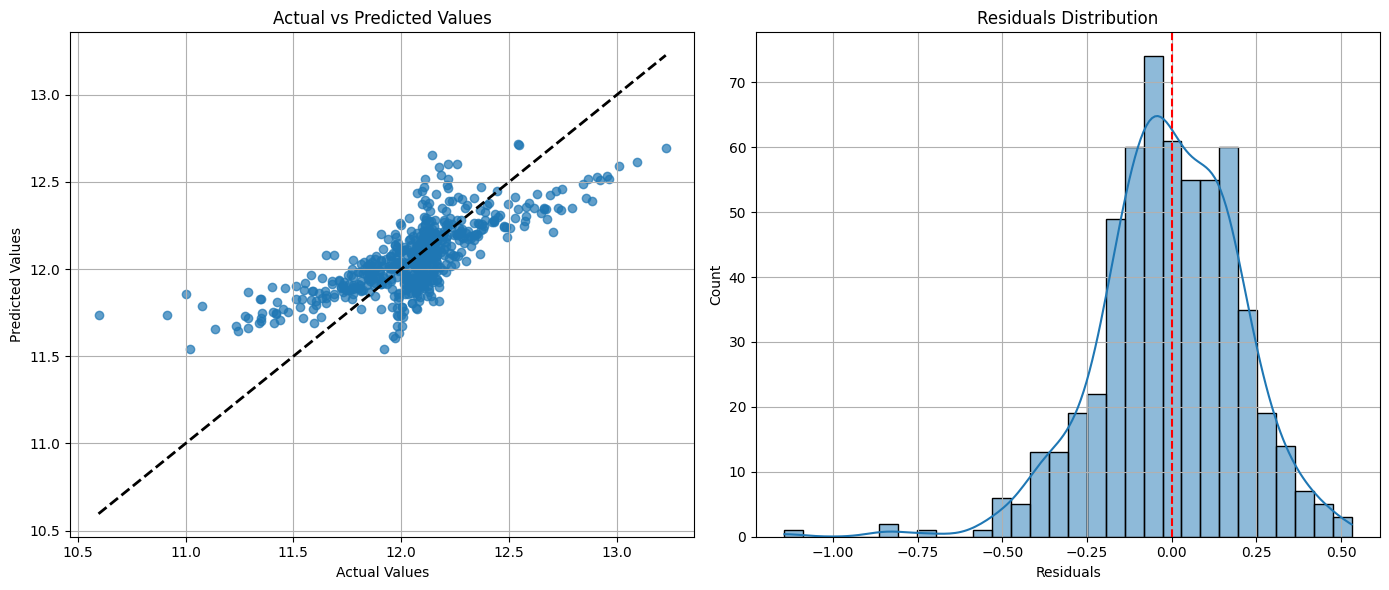

In [485]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Train the model
linear_regression_model.fit(X_train_linear_regression, y_train_linear_regression)

# Make predictions on the test set
y_pred_linear_regression = linear_regression_model.predict(X_test_linear_regression)

# Evaluate the model
mse_linear_regression = mean_squared_error(y_test_linear_regression, y_pred_linear_regression)
r2_linear_regression = r2_score(y_test_linear_regression, y_pred_linear_regression)

print(f'Mean Squared Error: {mse_linear_regression}')
print(f'R^2 Score: {r2_linear_regression}')

y_pred_linear_regression_train = linear_regression_model.predict(X_train_linear_regression)

# Evaluate the model on the training data
mse_linear_regression_train = mean_squared_error(y_train_linear_regression, y_pred_linear_regression_train)
r2_linear_regression_train = r2_score(y_train_linear_regression, y_pred_linear_regression_train)

print(f'Mean Squared Error (Train): {mse_linear_regression_train}')
print(f'R² Score (Train): {r2_linear_regression_train}')

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_linear_regression, y_pred_linear_regression, alpha=0.7)
plt.plot([y_test_linear_regression.min(), y_test_linear_regression.max()],
         [y_test_linear_regression.min(), y_test_linear_regression.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid()

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test_linear_regression - y_pred_linear_regression
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.grid()

plt.tight_layout()
plt.show()


In [486]:
y_test_linear_regression

142     12.019749
2495    12.214498
2803    12.232369
1726    11.964028
1943    12.282045
          ...    
701     11.849405
240     12.478010
1729    12.149430
110     11.827013
1922    12.075526
Name: SalePrice, Length: 580, dtype: float64

Linear Regression - R²: 0.5408277479854102, MSE: 0.0002521580980438509
Best Ridge Alpha: 100
Ridge Regression - R²: 0.5385811473688904
Best Gradient Boosting Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting - R²: 0.49916167384059906


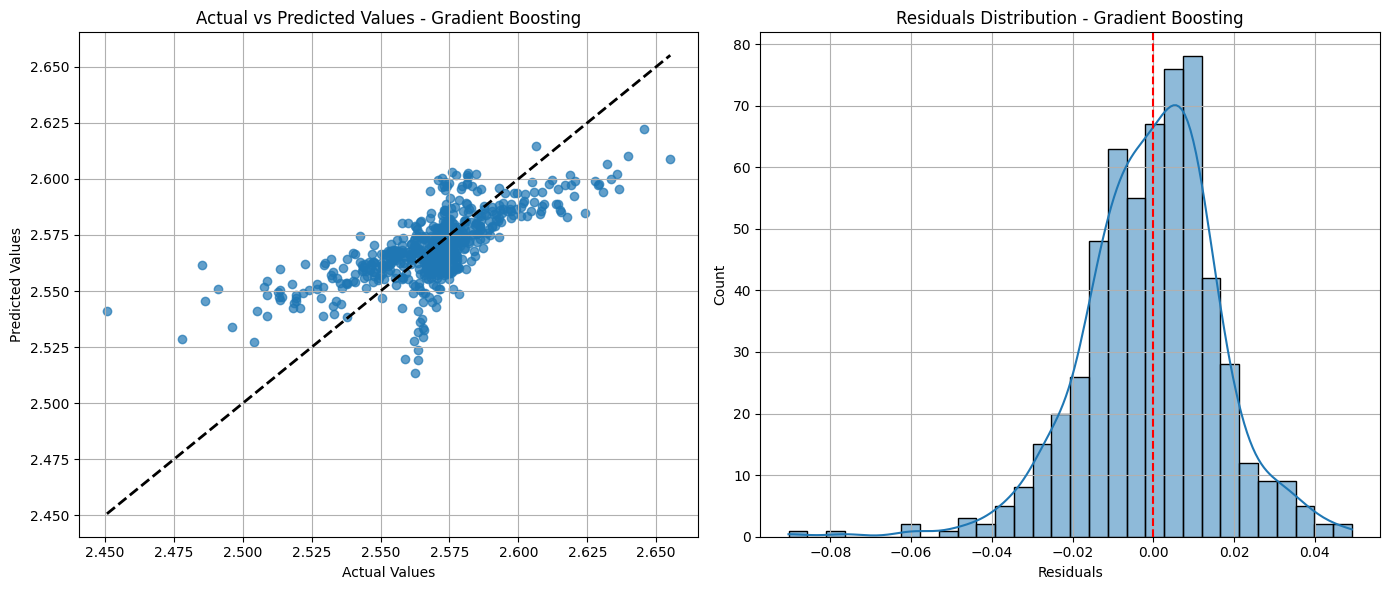

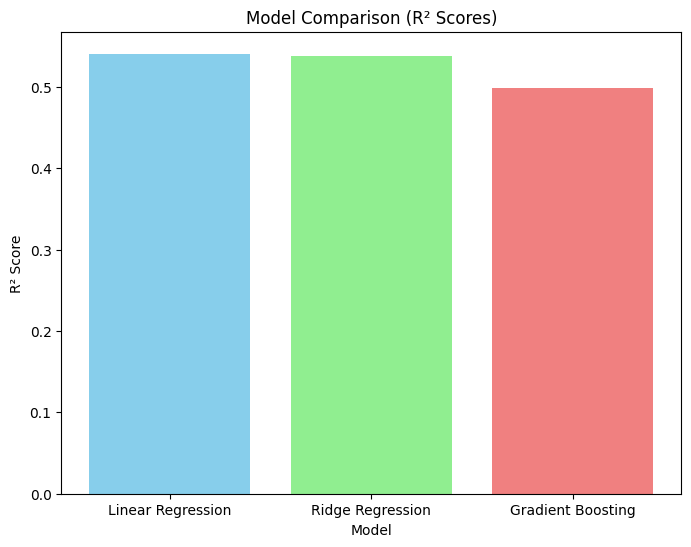

In [487]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (Assuming data is your pandas DataFrame)
# Replace this line with loading your actual dataset
# data = pd.read_csv("your_data.csv")

# Assuming X and y are your feature matrix and target variable respectively
X =linear_regression_data.drop('SalePrice', axis=1)  # replace 'target' with the name of your target column
y = linear_regression_data['SalePrice']  # replace 'target' with the name of your target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for models like Ridge and Gradient Boosting)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, apply log transformation to target if it's skewed
y_train_log = np.log1p(y_train)  # log(1 + y) transformation
y_test_log = np.log1p(y_test)

# --- Linear Regression ---
linear_regression_model1 = LinearRegression()
linear_regression_model1.fit(X_train_scaled, y_train_log)

# Predict and evaluate
y_pred_linear_regression = linear_regression_model1.predict(X_test_scaled)
mse_linear_regression = mean_squared_error(y_test_log, y_pred_linear_regression)
r2_linear_regression = r2_score(y_test_log, y_pred_linear_regression)
print(f'Linear Regression - R²: {r2_linear_regression}, MSE: {mse_linear_regression}')

# --- Ridge Regression with Hyperparameter Tuning ---
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Tuning regularization strength
ridge_grid = GridSearchCV(Ridge(), ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train_log)

best_ridge = ridge_grid.best_estimator_
print(f'Best Ridge Alpha: {ridge_grid.best_params_["alpha"]}')

# Evaluate Ridge Regression
y_pred_ridge = best_ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test_log, y_pred_ridge)
print(f'Ridge Regression - R²: {r2_ridge}')

# --- Gradient Boosting Regression with Hyperparameter Tuning ---
gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
gbm_grid = GridSearchCV(GradientBoostingRegressor(), gbm_param_grid, cv=5, scoring='neg_mean_squared_error')
gbm_grid.fit(X_train_scaled, y_train_log)

best_gbm = gbm_grid.best_estimator_
print(f'Best Gradient Boosting Parameters: {gbm_grid.best_params_}')

# Evaluate Gradient Boosting
y_pred_gbm = best_gbm.predict(X_test_scaled)
r2_gbm = r2_score(y_test_log, y_pred_gbm)
print(f'Gradient Boosting - R²: {r2_gbm}')

# --- Plotting Results ---

plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted values (for Gradient Boosting as the best performing model)
plt.subplot(1, 2, 1)
plt.scatter(y_test_log, y_pred_gbm, alpha=0.7)
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values - Gradient Boosting')
plt.grid()

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test_log - y_pred_gbm
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residuals Distribution - Gradient Boosting')
plt.grid()

plt.tight_layout()
plt.show()

# Optionally, compare all models with a simple bar chart for R² scores
models = ['Linear Regression', 'Ridge Regression', 'Gradient Boosting']
r2_scores = [r2_linear_regression, r2_ridge, r2_gbm]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('Model Comparison (R² Scores)')
plt.show()

In [488]:
# The MSE for both the test and training sets is quite close, which suggests that the model is not overfitting.
# The R² Score is around 0.55 for the test set and 0.49 for the training set, meaning the model is explaining around 55% of the variance in the test set and 49% in the training set. This is moderate performance, but there might be room for improving the model to capture more variance in the data.

In [489]:
X_train_linear_regression.columns

Index(['LotArea', 'MasVnrArea', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageFinish', 'GarageArea', 'AgeBuilt', 'AgeRemod',
       'totalsf', 'totalarea', 'totalbaths', 'OverallQuality_Condition',
       'ExteriorQuality_Condition', 'BasementQuality_Condition'],
      dtype='object')

In [490]:
linear_regression_model

LinearRegression()

In [491]:
categorical_columns = [
    "KitchenQual",
    "GarageType",
    "GarageFinish",
    "ExteriorQuality_Condition",
    "BasementQuality_Condition"
]

filtered_label_encoders = {col: label_encoders[col] for col in categorical_columns if col in label_encoders}

In [492]:
import pickle
pickle.dump(linear_regression_model1, open('model.pkl', 'wb'))

In [493]:
# import pickle
# pickle.dump(linear_regression_model, open('linear_regression_model.pkl', 'wb'))
# pickle.dump(fited_Scalar, open('fited_Scalar.pkl', 'wb'))
# # pickle.dump(label_encoders, open('label_encorder.pkl', 'wb'))

In [157]:
# pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [158]:
desired_numerical_columns = [
    "LotArea",
    "MasVnrArea",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageArea",
    "AgeBuilt",
    "AgeRemod",
    "totalsf",
    "totalarea",
    "totalbaths",
    "OverallQuality_Condition",
]
new_scaler = MinMaxScaler()
new_scaler.fit(combined_data[desired_numerical_columns])

MinMaxScaler()

In [159]:
# pickle.dump(new_scaler, open('new_scaler.pkl', 'wb'))

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
# new_data = pd.read_csv('your_data.csv')  # Uncomment and adjust this line to load your data

# Define features and target variable for linear regression
X_reg = linear_regression_data.drop(columns=['SalePrice'])  # Features (without target)
Y_reg = linear_regression_data['SalePrice']  # Continuous target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, Y_reg, test_size=0.2, random_state=42)

# Step : Initialize Polynomial Features
poly = PolynomialFeatures(degree=2)  # Adjust degree for complexity
X_train_poly = poly.fit_transform(X_train_reg)
X_test_poly = poly.transform(X_test_reg)

# Step 2: Initialize the Linear Regression model
linear_regression_model = LinearRegression()

# Step 3: Train the model on the training data
linear_regression_model.fit(X_train_poly, y_train_reg)

# Step 4: Make predictions on the test set
y_pred_reg = linear_regression_model.predict(X_test_poly)

# Step 5: Evaluate the linear regression model
mse_reg = mean_squared_error(y_test_reg, y_pred_reg)
r2_reg = r2_score(y_test_reg, y_pred_reg)

print("Linear Regression Model Evaluation (with Polynomial Features):")
print(f'Mean Squared Error (Linear Regression): {mse_reg}')
print(f'R^2 Score (Linear Regression): {r2_reg}')


Linear Regression Model Evaluation (with Polynomial Features):
Mean Squared Error (Linear Regression): 0.04669306942353007
R^2 Score (Linear Regression): 0.49651165429494404


In [161]:
#ridge

In [162]:
ridge_data = new_data.copy()

In [163]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline

# Define the features and target variable
X_polynomial = ridge_data.drop(columns=['SalePrice'])  # Features (all columns except SalePrice)
Y_polynomial = ridge_data['SalePrice']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train_polynomial, X_test_polynomial, y_train_polynomial, y_test_polynomial = train_test_split(X_polynomial, Y_polynomial, test_size=0.2, random_state=42)

# Step 1: Set up a pipeline with PolynomialFeatures and Ridge (regularized regression)
# Ridge regression includes a regularization term that can help reduce overfitting
pipeline = make_pipeline(PolynomialFeatures(), StandardScaler(), Ridge())

# Step 2: Define the parameter grid
param_grid = {
    'polynomialfeatures__degree': [2, 3, 4],  # Try different degrees of polynomial features
    'ridge__alpha': [0.1, 1, 10, 100]        # Different regularization strengths for Ridge
}

# Step 3: Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')  # cv=5 means 5-fold cross-validation
grid_search.fit(X_train_polynomial, y_train_polynomial)

# Step 4: Get the best model from the grid search
best_model = grid_search.best_estimator_

# Step 5: Predict on the test data using the best model
y_pred_polynomial = best_model.predict(X_test_polynomial)

# Step 6: Evaluate the best model
mse_polynomial = mean_squared_error(y_test_polynomial, y_pred_polynomial)
r2_polynomial = r2_score(y_test_polynomial, y_pred_polynomial)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error (Polynomial Regression with Tuning): {mse_polynomial}')
print(f'R^2 Score (Polynomial Regression with Tuning): {r2_polynomial}')

Best Parameters: {'polynomialfeatures__degree': 2, 'ridge__alpha': 100}
Mean Squared Error (Polynomial Regression with Tuning): 1495566285.0336244
R^2 Score (Polynomial Regression with Tuning): 0.5503802148727895


In [164]:
#lasso

In [165]:
laso_data = new_data.copy()

Mean Squared Error (Lasso): 1532802084.4096456
R^2 Score (Lasso): 0.5391858249737754
Mean Squared Error (Train - Lasso): 1486553553.1555517
R² Score (Train - Lasso): 0.4829193732337065


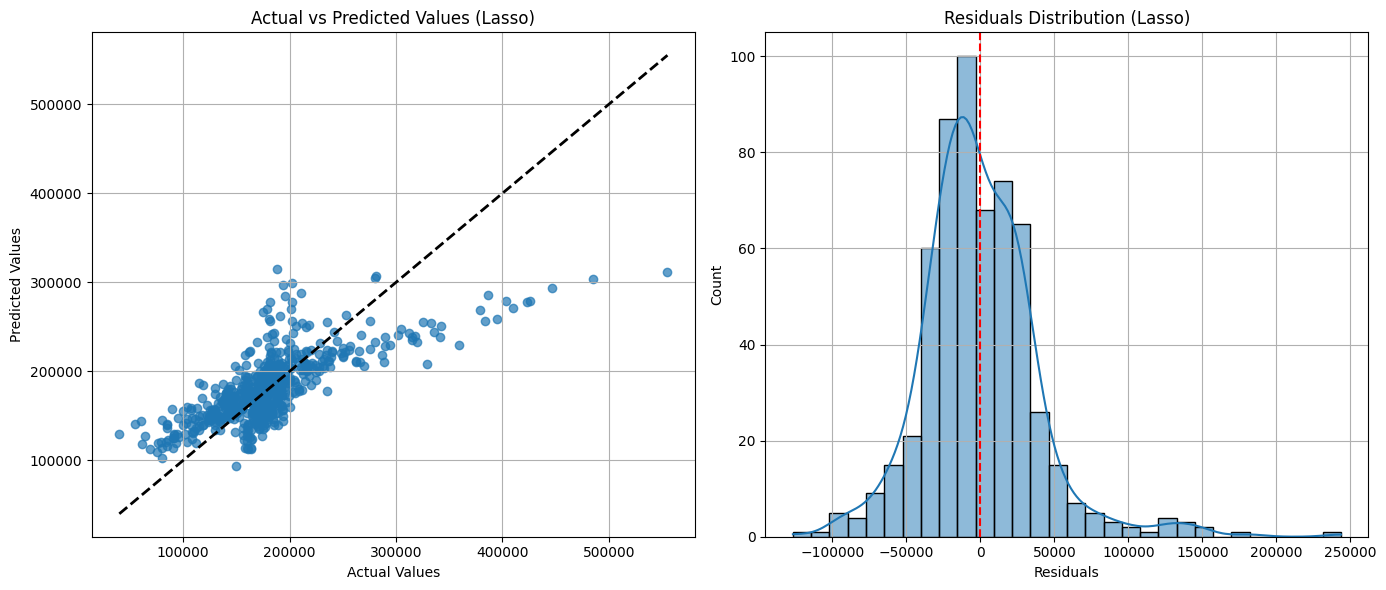

In [166]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
X = laso_data.drop(columns=['SalePrice'])
y = laso_data['SalePrice']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter (regularization strength)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'R^2 Score (Lasso): {r2_lasso}')

# Evaluate the model on the training data
y_pred_lasso_train = lasso_model.predict(X_train)
mse_lasso_train = mean_squared_error(y_train, y_pred_lasso_train)
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

print(f'Mean Squared Error (Train - Lasso): {mse_lasso_train}')
print(f'R² Score (Train - Lasso): {r2_lasso_train}')

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Lasso)')
plt.grid()

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_lasso
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residuals Distribution (Lasso)')
plt.grid()

plt.tight_layout()
plt.show()


In [167]:
#huber regressor

Huber Loss (Test): 0.021090229806874406
Huber Loss (Train): 0.02069198322333062


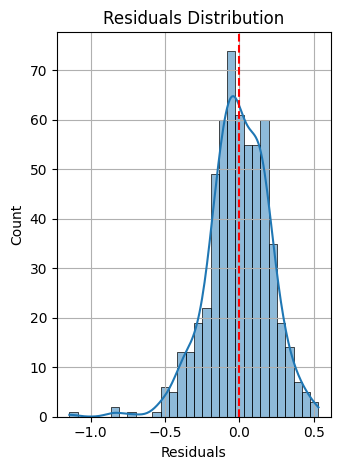

In [168]:
import numpy as np

# Define the Huber Loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    loss = np.where(np.abs(error) <= delta,
                    0.5 * np.square(error),
                    delta * (np.abs(error) - 0.5 * delta))
    return np.mean(loss)
huber_loss_test = huber_loss(y_test_linear_regression, y_pred_linear_regression, delta=1.0)
print(f'Huber Loss (Test): {huber_loss_test}')

huber_loss_train = huber_loss(y_train_linear_regression, y_pred_linear_regression_train, delta=1.0)
print(f'Huber Loss (Train): {huber_loss_train}')

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test_linear_regression - y_pred_linear_regression
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.grid()

plt.tight_layout()
plt.show()

In [169]:
# Low Huber Loss: Both values are relatively low, suggesting that the predictions are quite accurate for both the training and test datasets.
# The model appears to perform well in minimizing the prediction error.

# Train vs. Test Loss: 
# The Huber Loss is slightly higher on the test dataset than on the training dataset, which is typical as models often fit the training data slightly better than unseen data.
# The difference is minor, which suggests that your model generalizes reasonably well.

Mean Squared Error (Huber): 0.08400021186555397
R^2 Score (Huber): 0.09423115179167962
Mean Squared Error (Train, Huber): 0.08352923289767615
R² Score (Train, Huber): -0.043501043654697646


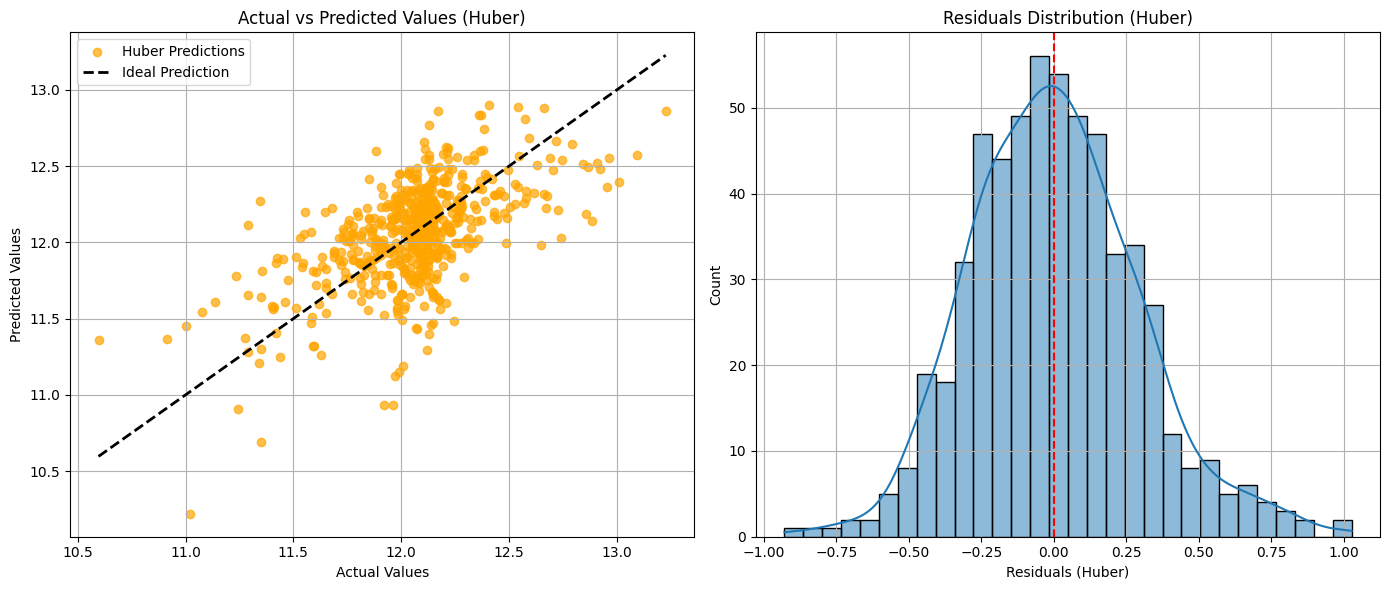

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Huber Regressor
huber_regressor = HuberRegressor()

# Train the model
huber_regressor.fit(X_train_linear_regression, y_train_linear_regression)

# Make predictions on the test set
y_pred_huber = huber_regressor.predict(X_test_linear_regression)

# Evaluate the model
mse_huber = mean_squared_error(y_test_linear_regression, y_pred_huber)
r2_huber = r2_score(y_test_linear_regression, y_pred_huber)

print(f'Mean Squared Error (Huber): {mse_huber}')
print(f'R^2 Score (Huber): {r2_huber}')

# Make predictions on the training set
y_pred_huber_train = huber_regressor.predict(X_train_linear_regression)

# Evaluate the model on the training data
mse_huber_train = mean_squared_error(y_train_linear_regression, y_pred_huber_train)
r2_huber_train = r2_score(y_train_linear_regression, y_pred_huber_train)

print(f'Mean Squared Error (Train, Huber): {mse_huber_train}')
print(f'R² Score (Train, Huber): {r2_huber_train}')

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test_linear_regression, y_pred_huber, alpha=0.7, label='Huber Predictions', color='orange')
plt.plot([y_test_linear_regression.min(), y_test_linear_regression.max()],
         [y_test_linear_regression.min(), y_test_linear_regression.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Huber)')
plt.legend()
plt.grid()

# Residual plot
plt.subplot(1, 2, 2)
residuals_huber = y_test_linear_regression - y_pred_huber
sns.histplot(residuals_huber, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals (Huber)')
plt.title('Residuals Distribution (Huber)')
plt.grid()

plt.tight_layout()
plt.show()


In [171]:
random_forest_data = new_data.copy()

In [172]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Features and target
X = random_forest_data.drop(columns=['SalePrice'])
y = random_forest_data['SalePrice']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider when looking for the best split
}

# Initialize GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                              scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=1)

# Train the model with the best hyperparameters
grid_search_rf.fit(X_train, y_train)

# Best parameters found by GridSearch
best_rf_params = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_rf_params}')

# Predict on the test set using the best estimator
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model with the best hyperparameters
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = best_rf_model.score(X_test, y_test)

print(f'Optimized Random Forest RMSE: {rmse_rf}')
print(f'Optimized Random Forest R-squared: {r2_rf}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters for Random Forest: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest RMSE: 38577.90269648346
Optimized Random Forest R-squared: 0.5525783714312638


In [173]:
#DecisionTreeRegressor

In [174]:
decision_tree_data = new_data.copy()

Mean Squared Error (Decision Tree): 3280259569.906654
R^2 Score (Decision Tree): 0.013838692579415501
Mean Squared Error (Train - Decision Tree): 3358844.5708679305
R² Score (Train - Decision Tree): 0.9988316643875842


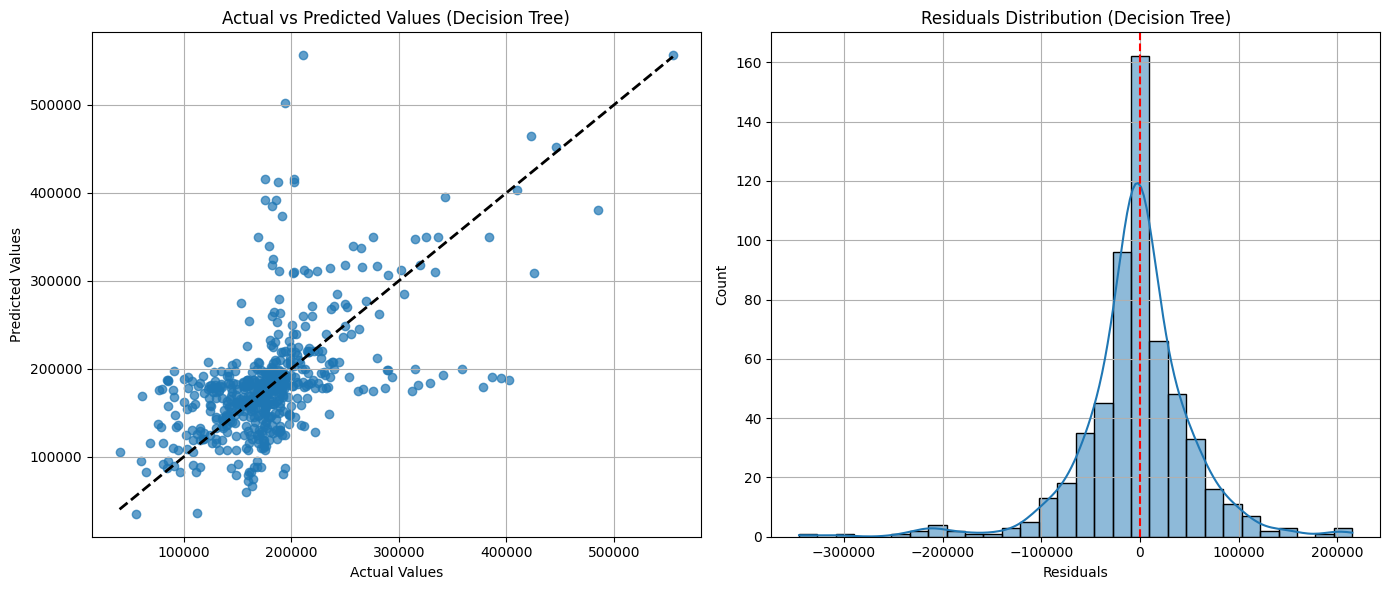

In [175]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
X = decision_tree_data.drop(columns=['SalePrice'])
y = decision_tree_data['SalePrice']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the model
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print(f'Mean Squared Error (Decision Tree): {mse_decision_tree}')
print(f'R^2 Score (Decision Tree): {r2_decision_tree}')

# Evaluate the model on the training data
y_pred_decision_tree_train = decision_tree_model.predict(X_train)
mse_decision_tree_train = mean_squared_error(y_train, y_pred_decision_tree_train)
r2_decision_tree_train = r2_score(y_train, y_pred_decision_tree_train)

print(f'Mean Squared Error (Train - Decision Tree): {mse_decision_tree_train}')
print(f'R² Score (Train - Decision Tree): {r2_decision_tree_train}')

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_decision_tree, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Decision Tree)')
plt.grid()

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_decision_tree
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residuals Distribution (Decision Tree)')
plt.grid()

plt.tight_layout()
plt.show()


In [176]:
#Decision Tree model is overfitting

In [177]:
#Support Vector Regression (SVR)

In [178]:
Support_Vector_Regression_data = new_data.copy()

Mean Squared Error (SVR): 3107924795.678458
R^2 Score (SVR): 0.06564858220706626
Mean Squared Error (Train - SVR): 2667426594.5329514
R² Score (Train - SVR): 0.07216621128357525


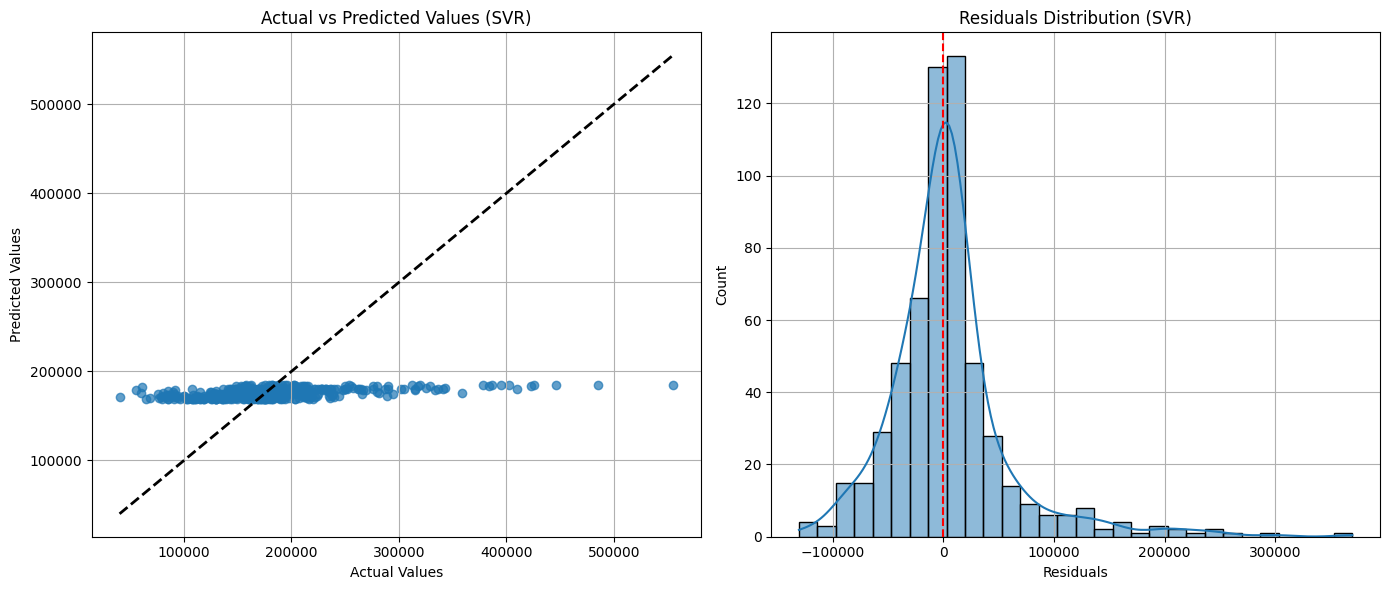

In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
X = Support_Vector_Regression_data.drop(columns=['SalePrice'])
y = Support_Vector_Regression_data['SalePrice']

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='scale')  # You can adjust C and gamma parameters

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Mean Squared Error (SVR): {mse_svr}')
print(f'R^2 Score (SVR): {r2_svr}')

# Evaluate the model on the training data
y_pred_svr_train = svr_model.predict(X_train)
mse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
r2_svr_train = r2_score(y_train, y_pred_svr_train)

print(f'Mean Squared Error (Train - SVR): {mse_svr_train}')
print(f'R² Score (Train - SVR): {r2_svr_train}')

# Plotting
plt.figure(figsize=(14, 6))

# Scatter plot of actual vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_svr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (SVR)')
plt.grid()

# Residual plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred_svr
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residuals Distribution (SVR)')
plt.grid()

plt.tight_layout()
plt.show()


In [180]:
import pickle
pickle.dump(linear_regression_model, open('artifacts/linear_regression_model.pkl', 'wb'))